# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score as sil, silhouette_samples
import warnings
warnings.filterwarnings('ignore')

# Uploading csv file

In [ ]:
from google.colab import files
up=files.upload()

Saving wine.csv to wine.csv


# Problem statement

In [ ]:
with open('PCA_problem Statement.txt','r') as f:
    print(f.read())

Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df



# EDA

In [ ]:
data=pd.read_csv('wine.csv')
data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


##**As we are building unsupervised model , we dont need target variable**

In [ ]:
df=data.drop(columns='Type')

In [ ]:
df.isnull().sum().any()

False

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.skew()

Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
dtype: float64

## feature distribution

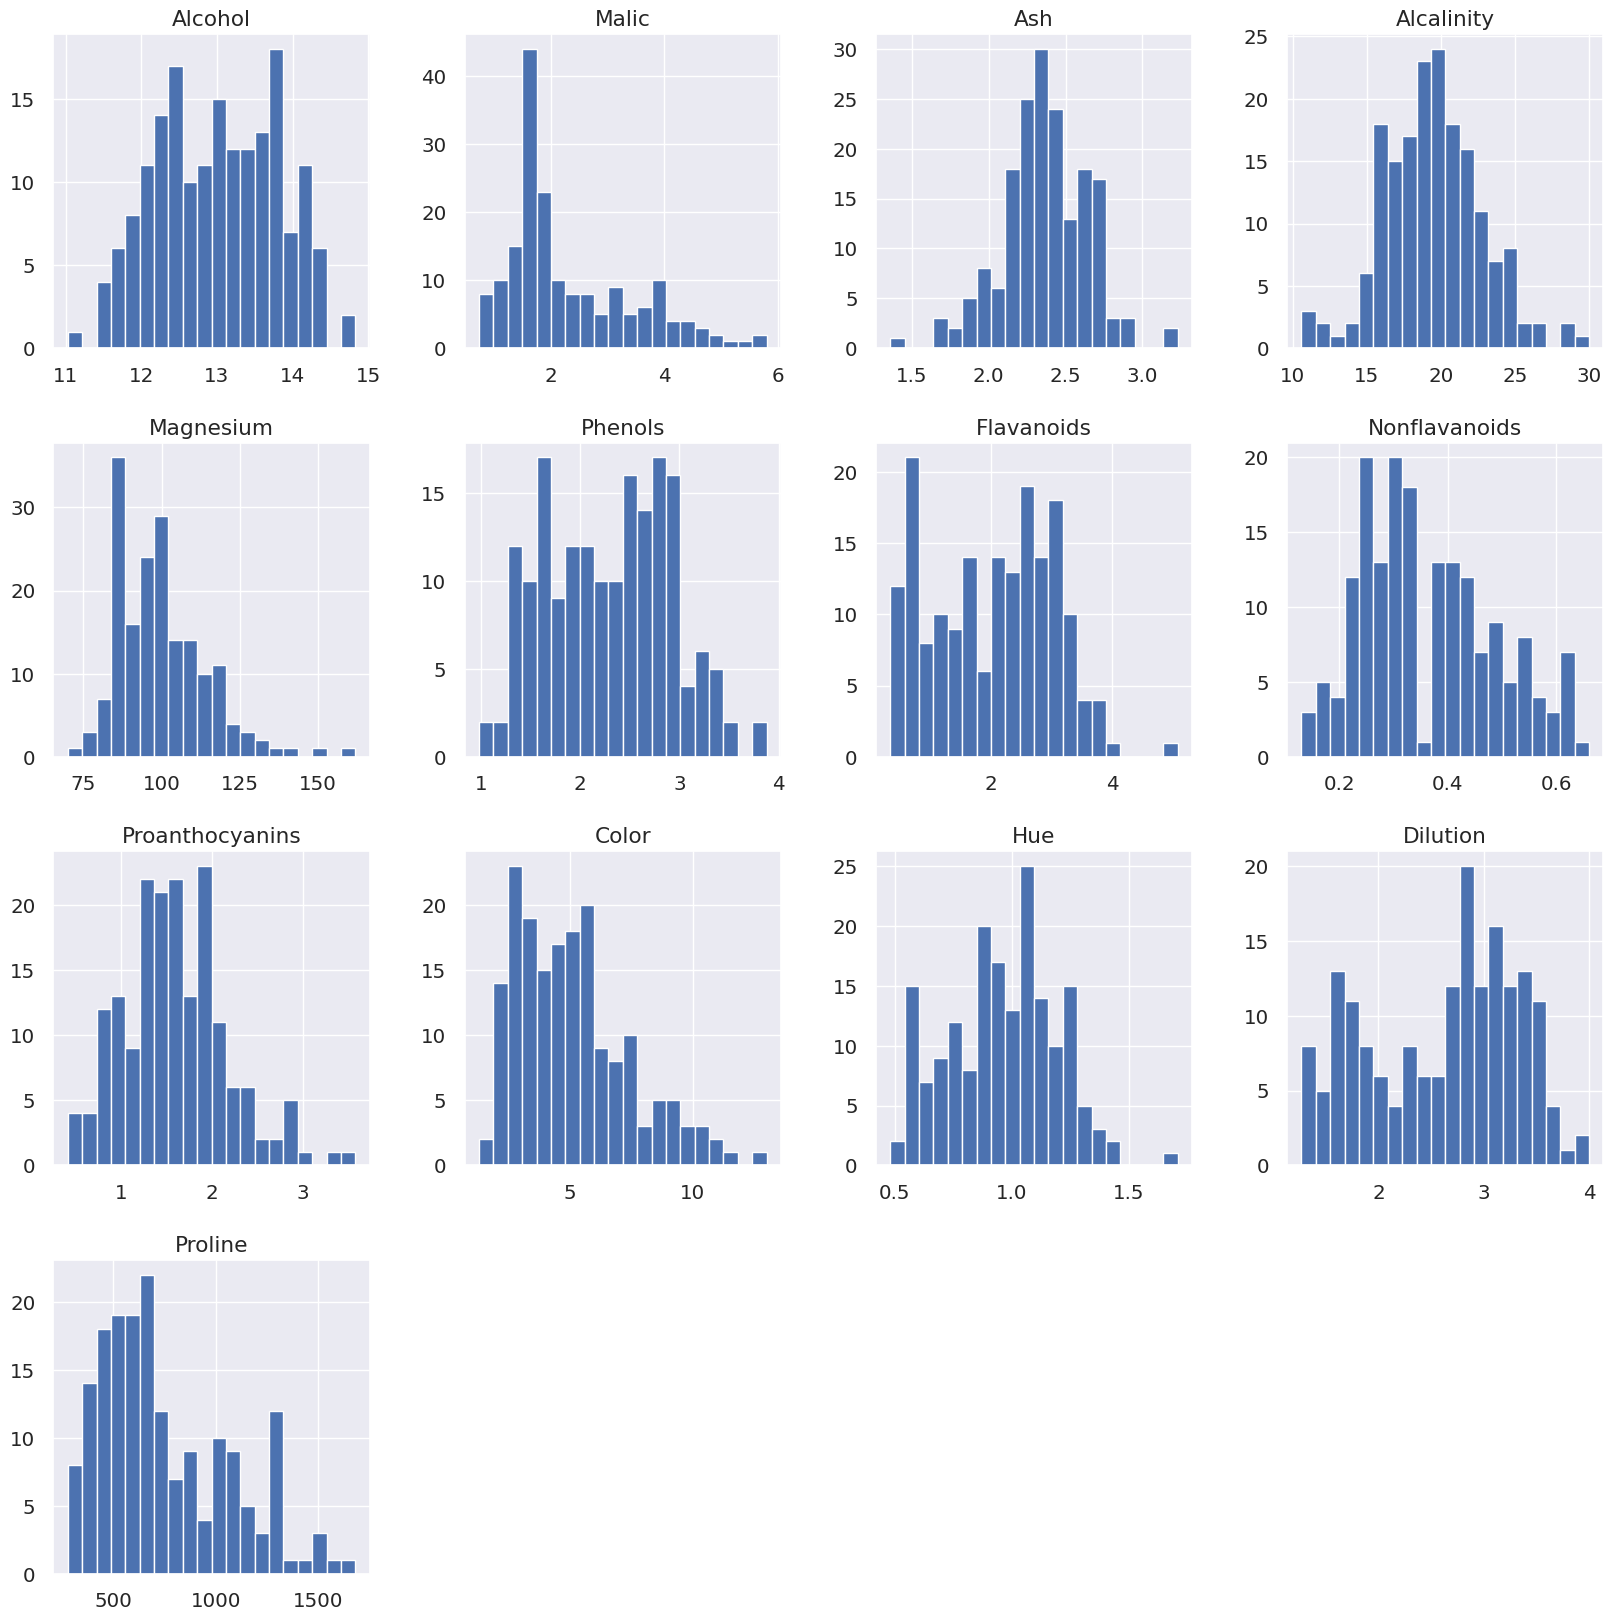

In [ ]:
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(20,20)})
df.hist(bins=20 );

## Outliers

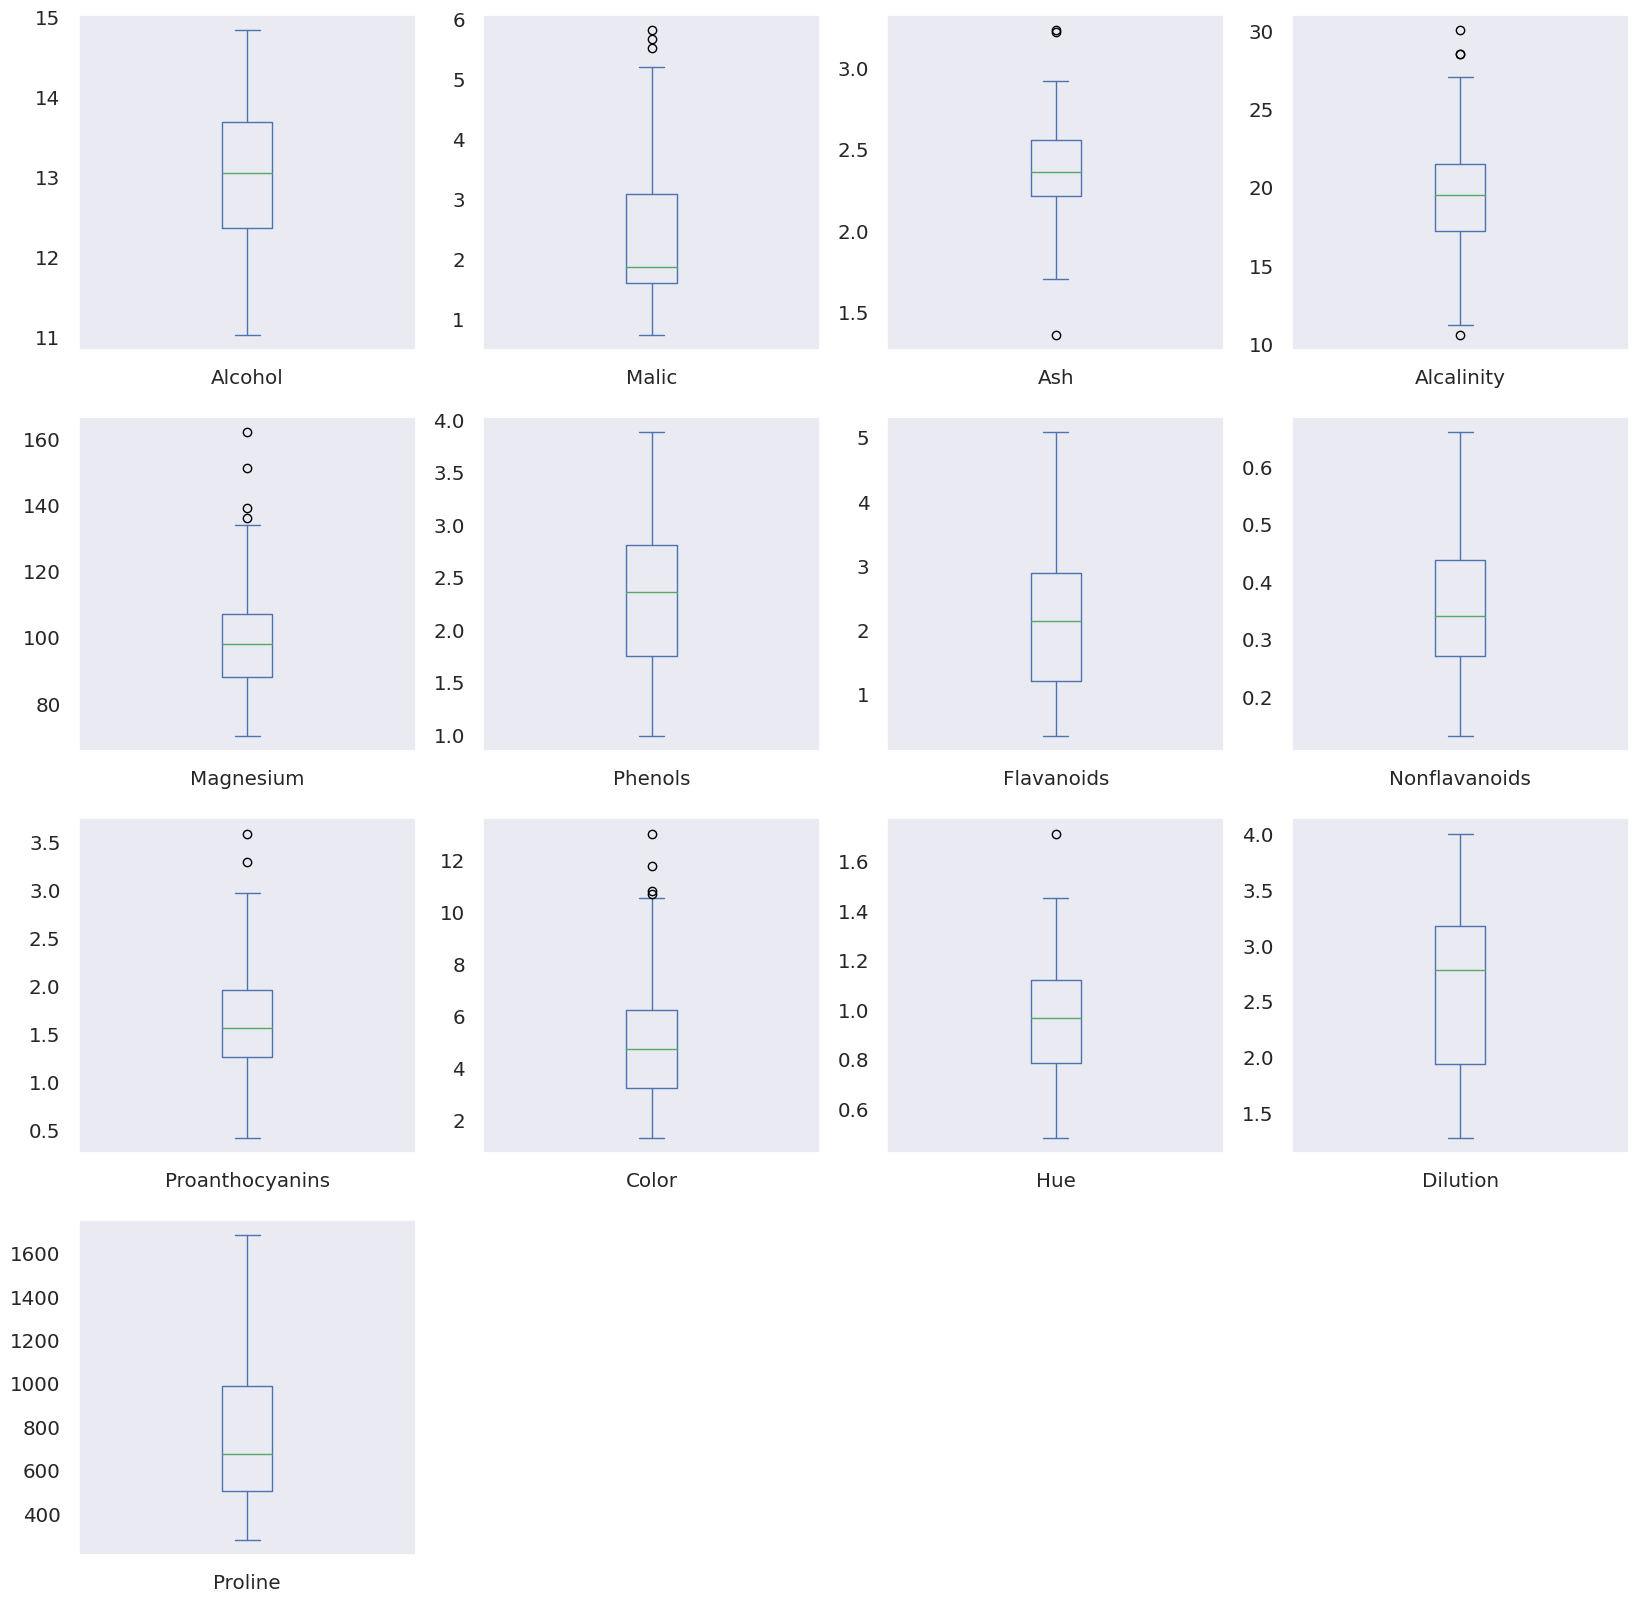

In [ ]:
df.plot(kind='box',subplots = True,layout = (4,4),sharex = False, sharey = False);

## Correlation

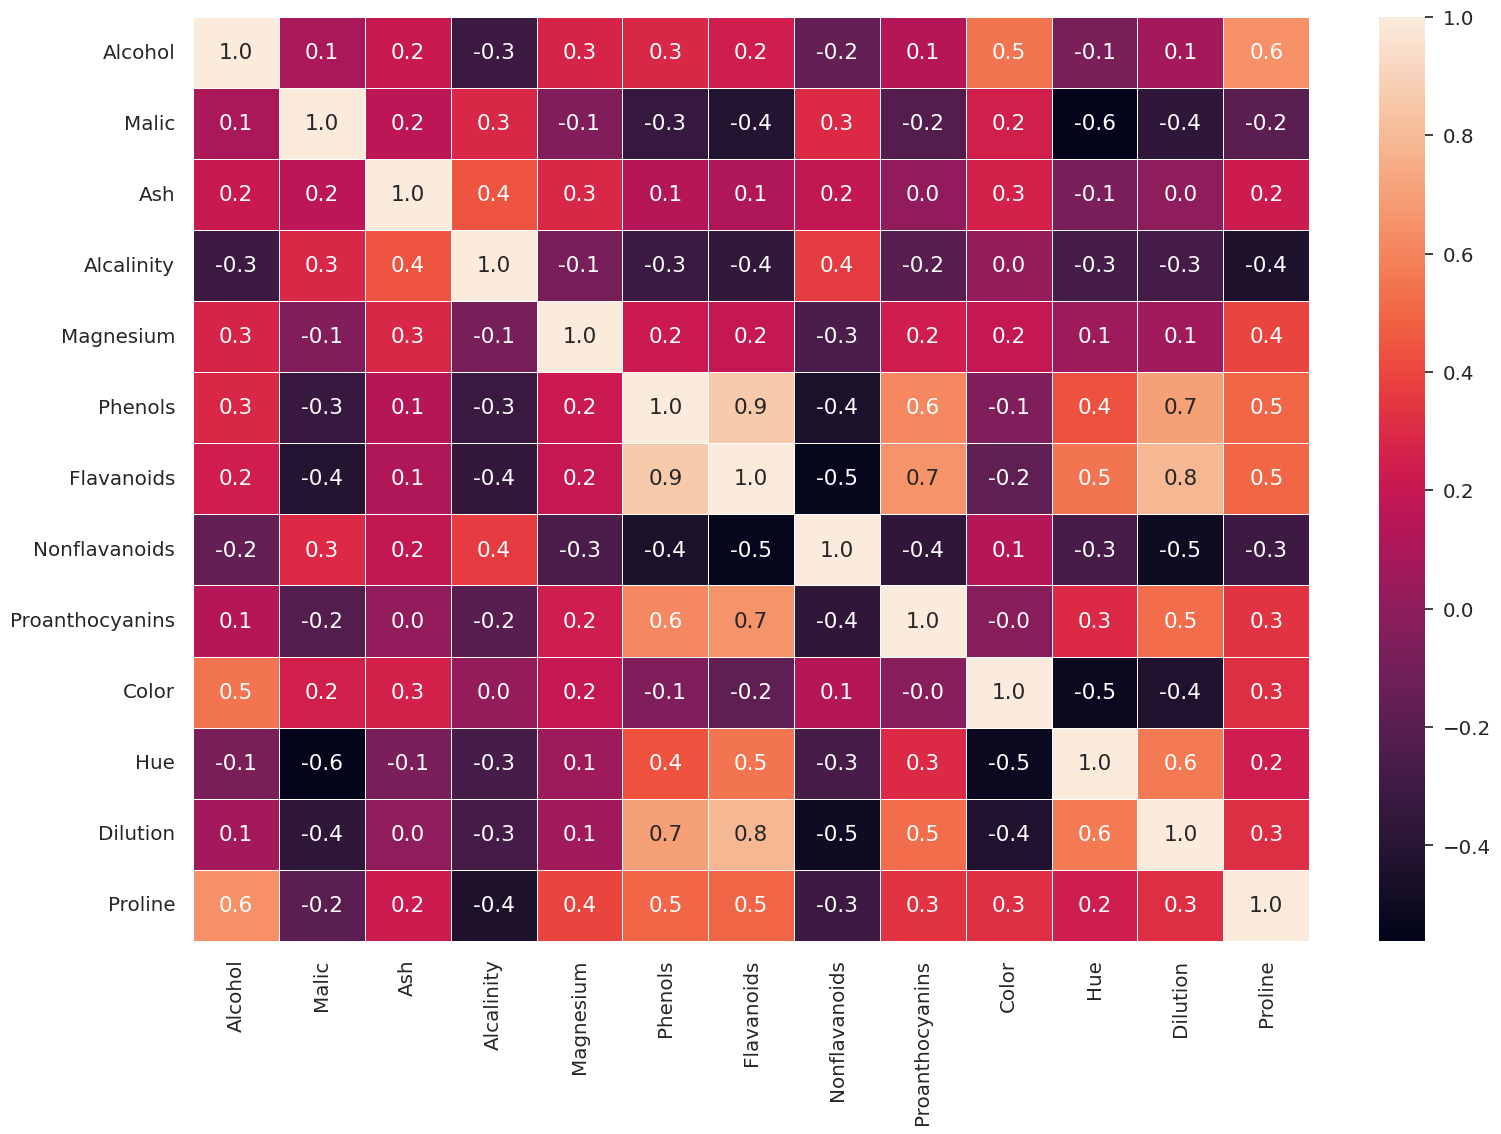

In [ ]:
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

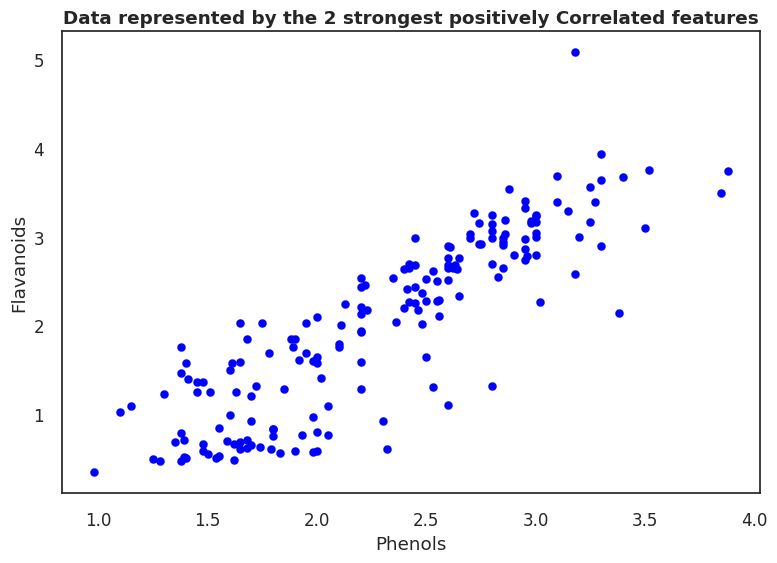

In [ ]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)
plt.scatter(x=df['Phenols'], y=df['Flavanoids'], color='blue',lw=0.1)
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')
plt.title('Data represented by the 2 strongest positively Correlated features',fontweight='bold')
plt.show()

# Scaling the data

In [ ]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
minmax = MinMaxScaler()
minmax_df = minmax.fit_transform(df)

# PCA on standard scaled data

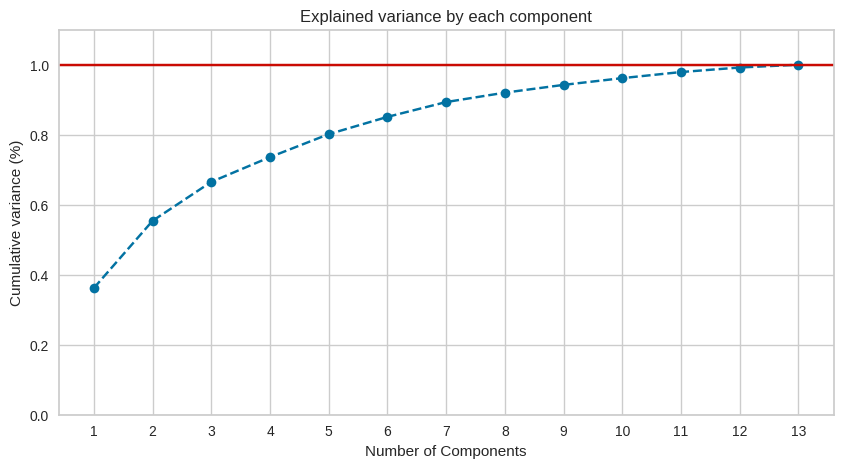

In [ ]:
pca_var = PCA()
pca_var.fit(std_df)
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+std_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+std_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')

Text(0.5, 1.0, 'Explained variance by each component')

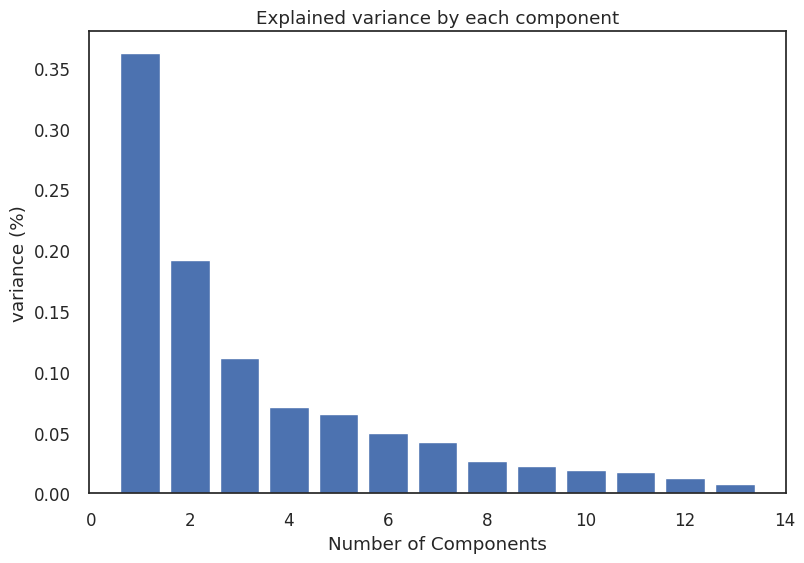

In [ ]:
var=pca_var.explained_variance_ratio_
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

## Creating PCA with 3 components

In [ ]:
pca_var=PCA(n_components=3)
pca_data=pca_var.fit_transform(std_df)
pca_std_df=pd.DataFrame(pca_data,columns=['PCA1','PCA2','PCA3'])
pca_std_df.head()

PCA1      PCA2      PCA3
0  3.316751 -1.443463 -0.165739
1  2.209465  0.333393 -2.026457
2  2.516740 -1.031151  0.982819
3  3.757066 -2.756372 -0.176192
4  1.008908 -0.869831  2.026688

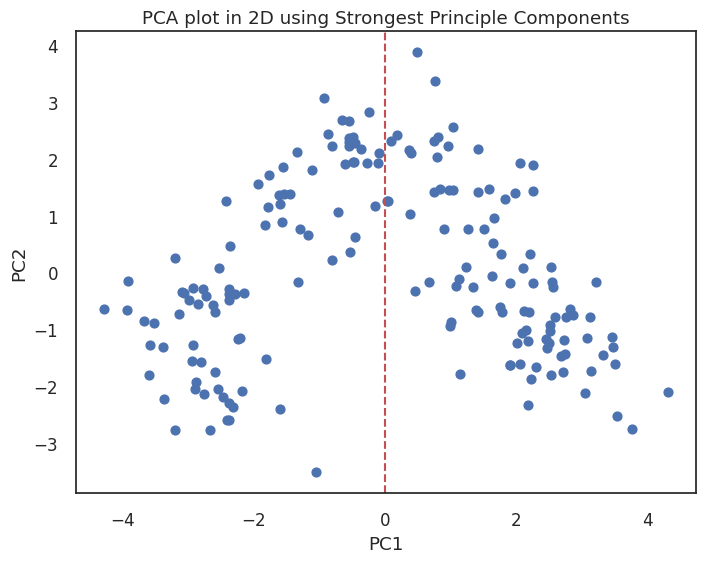

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], s=40)
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axvline(x=0,c='r',linestyle='--');

# PCA on minmax scaled data

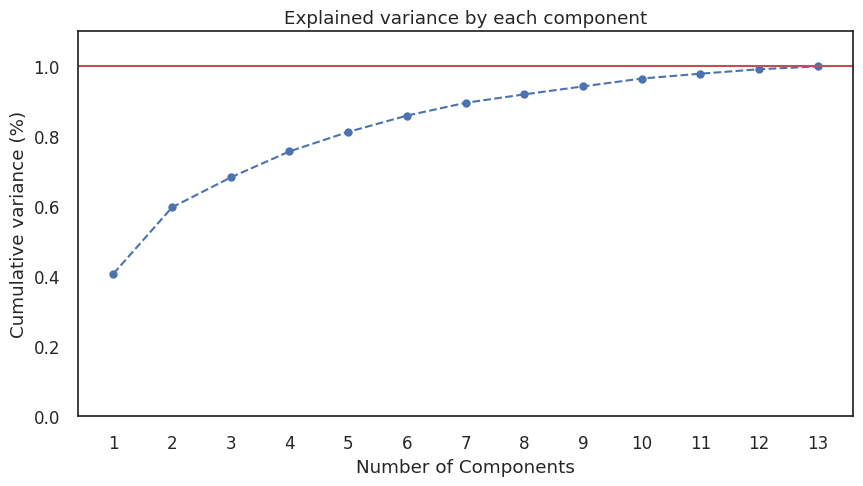

In [ ]:
pca_var = PCA()
pca_var.fit(minmax_df)
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+minmax_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+minmax_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

Text(0.5, 1.0, 'Explained variance by each component')

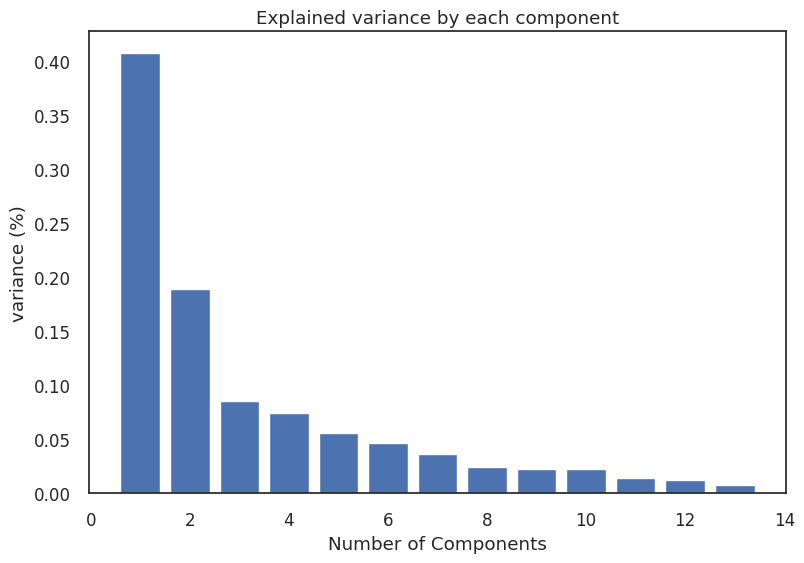

In [ ]:
var=pca_var.explained_variance_ratio_
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [ ]:
pca = PCA(n_components=3)
pca_minmax = pca.fit_transform(minmax_df)
pca_minmax_df = pd.DataFrame(data = pca_minmax, columns = ['PC1', 'PC2','PC3'])
pca_minmax_df.head()

PC1       PC2       PC3
0 -0.706336 -0.253193  0.024093
1 -0.484977 -0.008823 -0.280482
2 -0.521172 -0.189187  0.196217
3 -0.821644 -0.580906  0.081110
4 -0.202546 -0.059467  0.300240

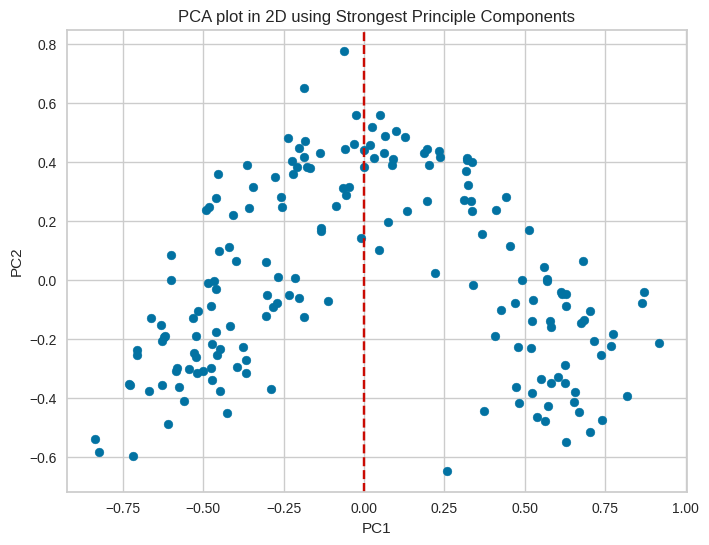

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], s=40)
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axvline(x=0,c='r',linestyle='--');

# Kmeans model on pca standard scaled data

In [ ]:
from tqdm import tqdm
inertia = []
silhouette = {}
for i in tqdm(range(2,10),desc='Building Models',position=0):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init=15,max_iter=500,random_state=17)
    kmeans.fit(pca_std_df)
    inertia.append(kmeans.inertia_)
    silhouette[i] = sil(pca_std_df, kmeans.labels_, metric='euclidean')

Building Models: 100%|██████████| 8/8 [00:00<00:00, 28.95it/s]


# Analysing the best model

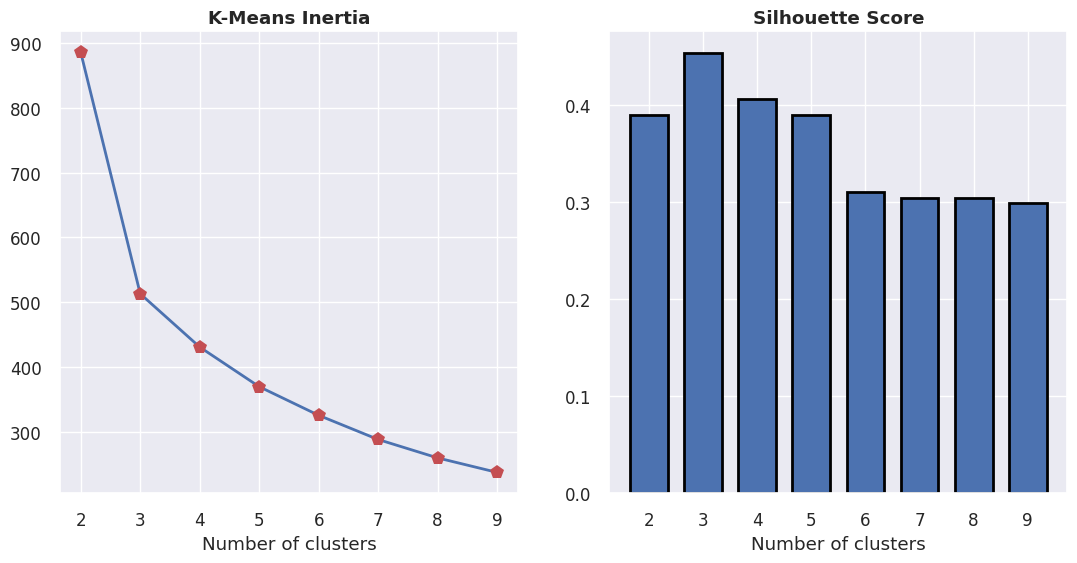

In [ ]:
sns.set(style="darkgrid", rc={'figure.figsize':(13,6)}, font_scale=1.1)
plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="p", lw=2, mfc='r', ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia", fontweight='bold')
plt.subplot(1,2,2)
plt.bar(range(len(silhouette)),list(silhouette.values()),align='center',width=.7,edgecolor="black",lw=2)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters")
plt.title("Silhouette Score", fontweight='bold')
plt.show()

Elbow Plot for Standard Scaler data


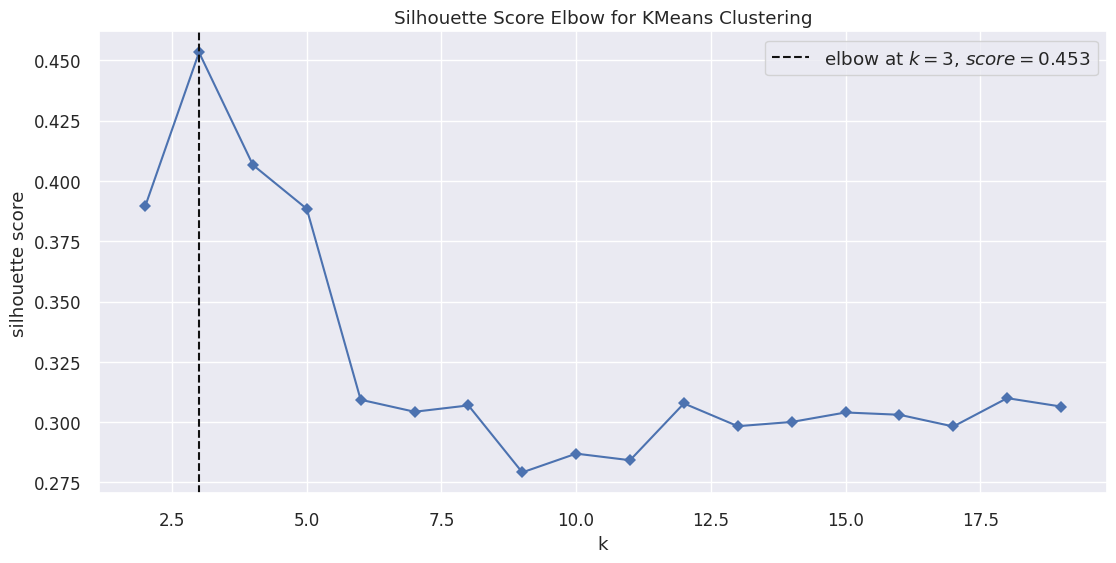

For n_clusters = 2 The average silhouette_score is : 0.3893881308900331
For n_clusters = 3 The average silhouette_score is : 0.4532351215683952
For n_clusters = 4 The average silhouette_score is : 0.40658110653281215
For n_clusters = 5 The average silhouette_score is : 0.38838256749779204
For n_clusters = 6 The average silhouette_score is : 0.3092945023461352
For n_clusters = 7 The average silhouette_score is : 0.30430767569226164
For n_clusters = 8 The average silhouette_score is : 0.30693541124109935
For n_clusters = 9 The average silhouette_score is : 0.27918386492808356


In [ ]:
model = KMeans(random_state=17, max_iter=500, init='k-means++')
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
print('Elbow Plot for Standard Scaler data')
visualizer.fit(pca_std_df)
visualizer.show();
clust_list = [2,3,4,5,6,7,8,9]
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=17)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= sil(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

## Silhoette score is maximum for cluster 3

Analysing and Plotting silhouette score:   0%|          | 0/8 [00:00<?, ?it/s]

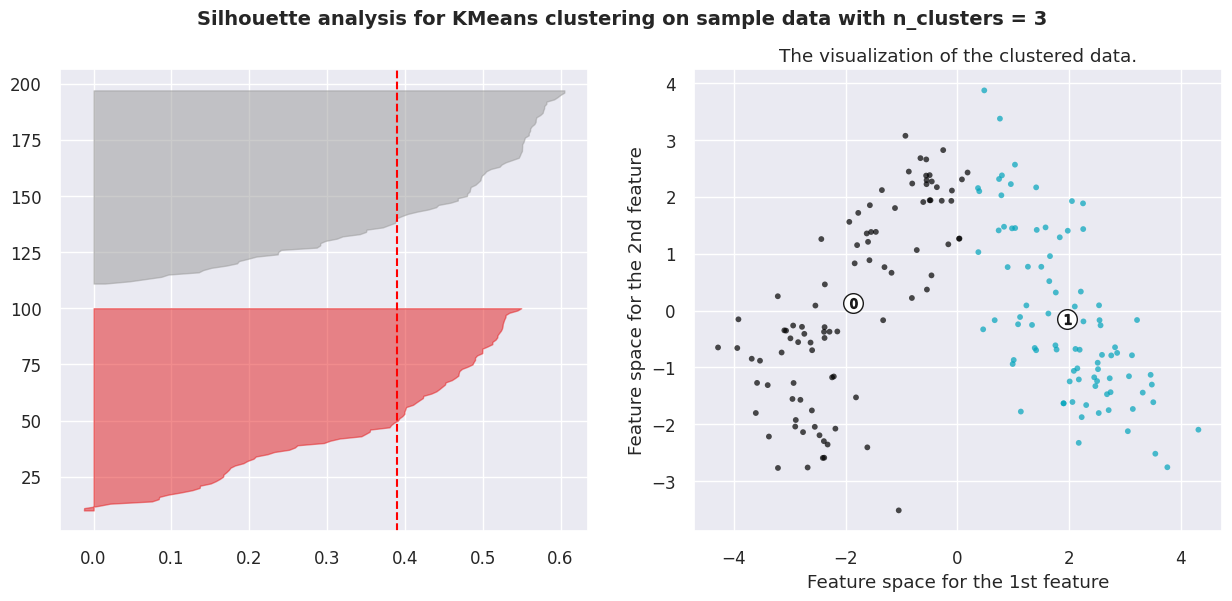

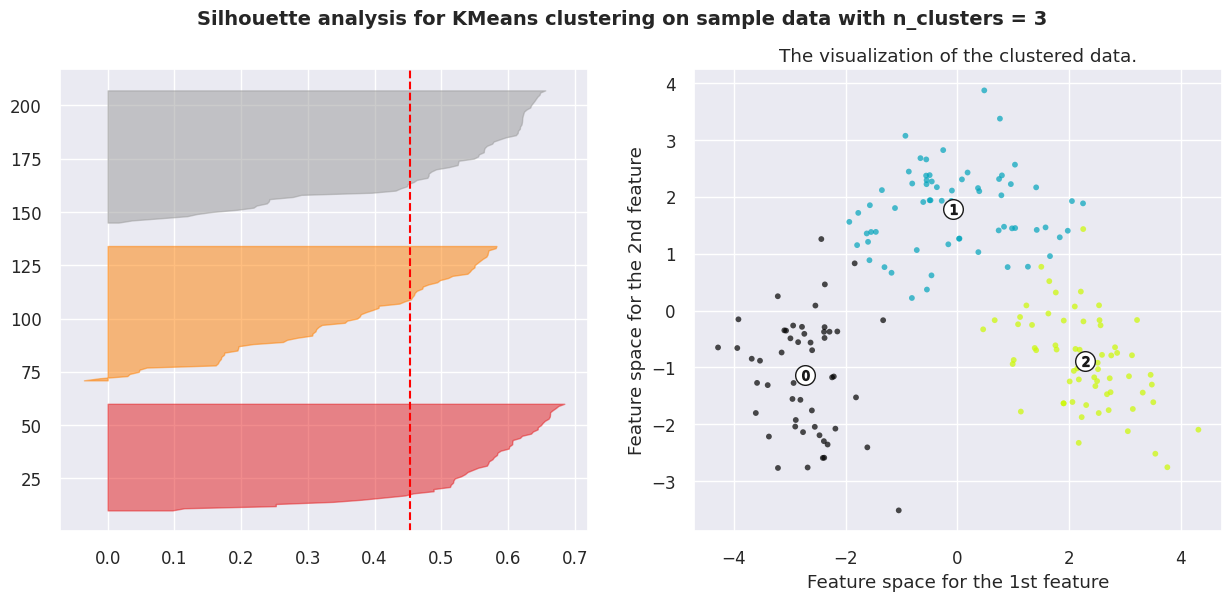

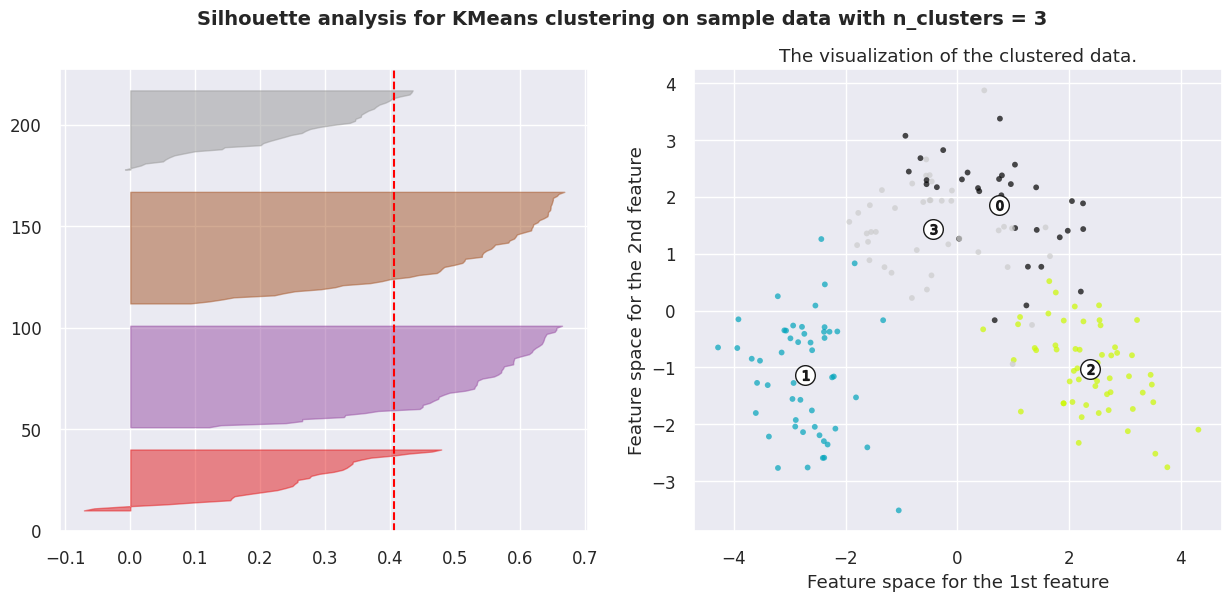

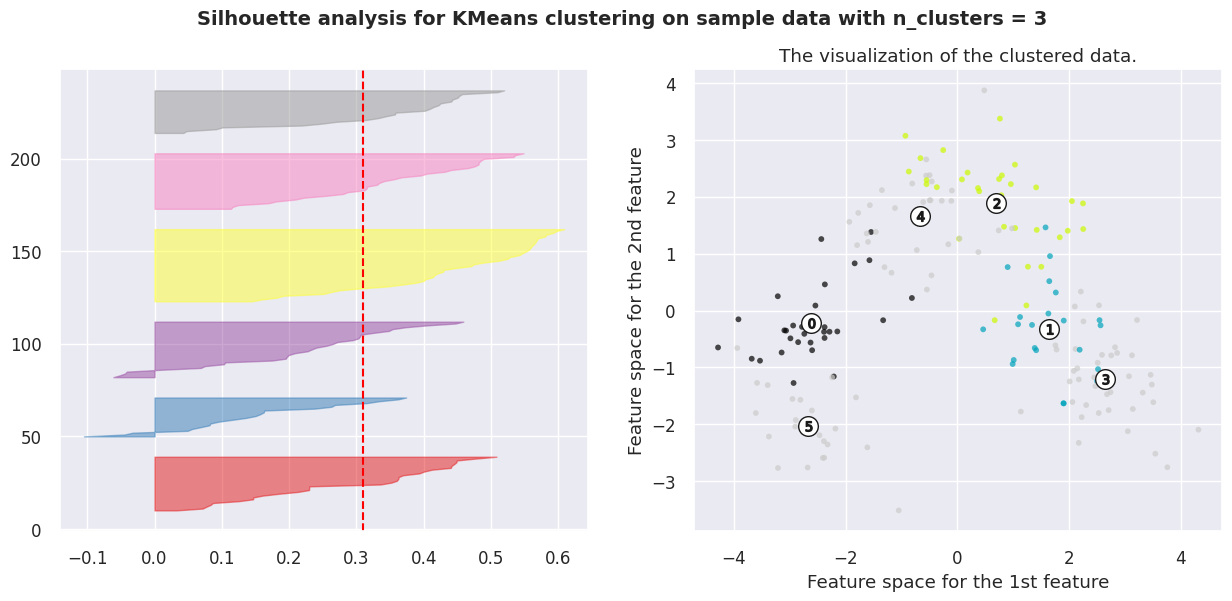

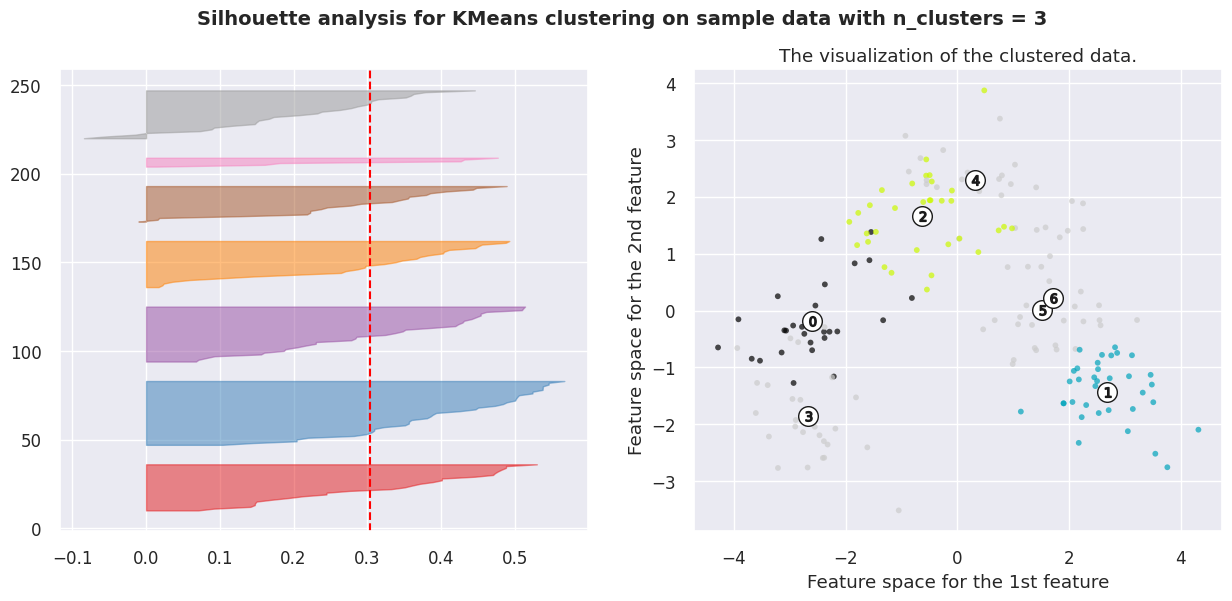

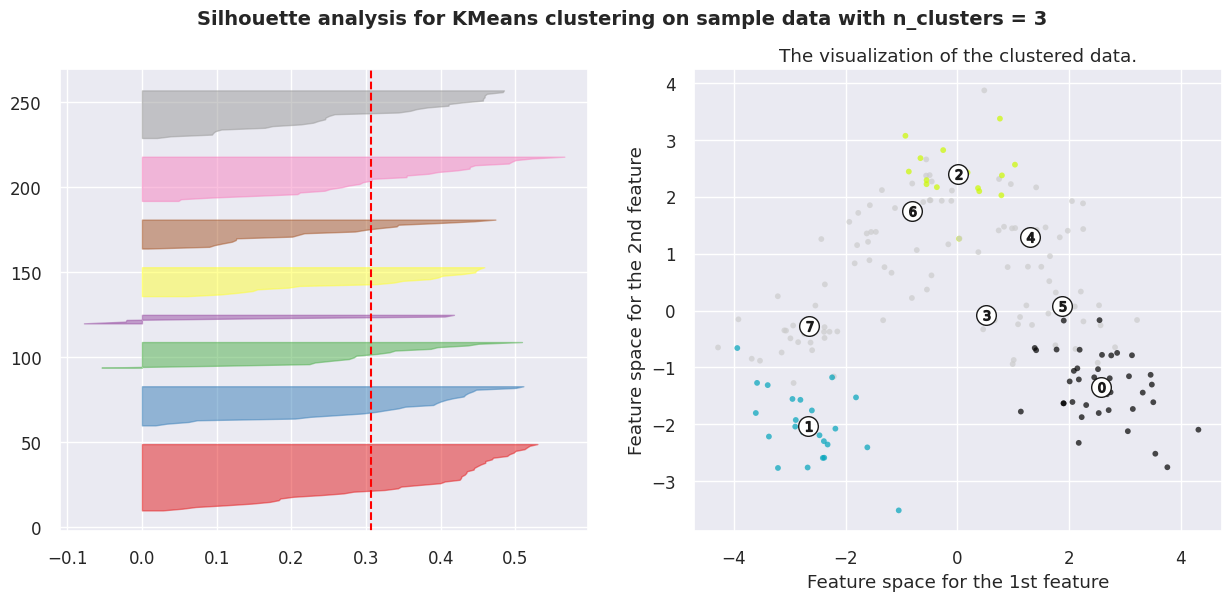

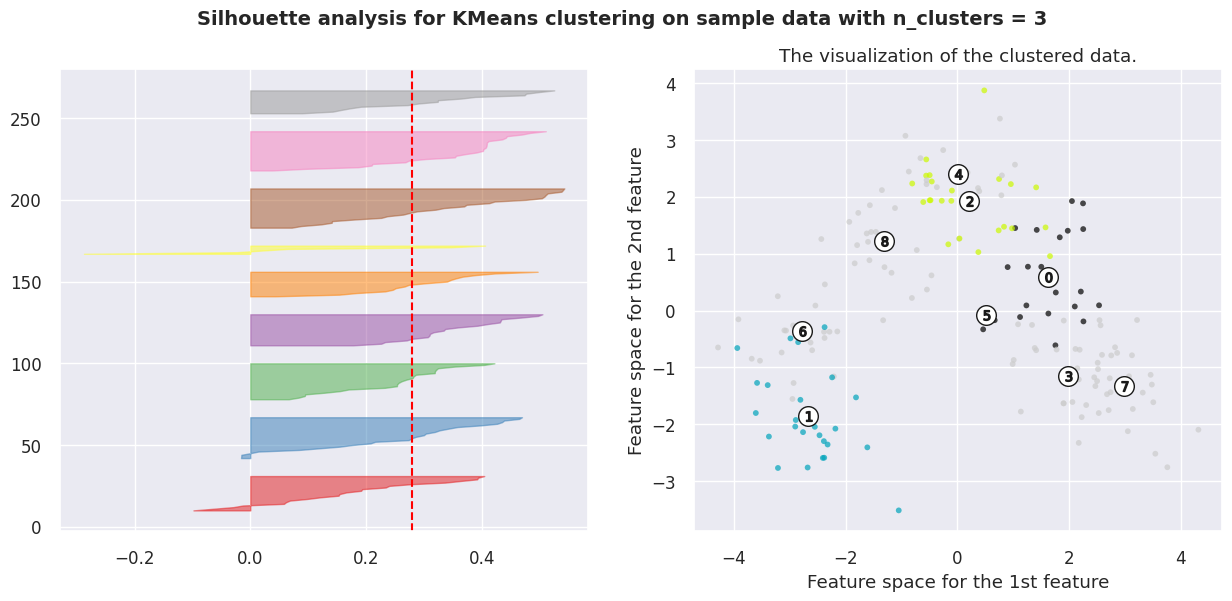

In [ ]:
from tqdm import notebook as tq
import matplotlib.cm as cm
for i in tq.tqdm(range(2,10),desc='Analysing and Plotting silhouette score'):
    model_kmeans = KMeans(n_clusters=i, random_state=17, init='k-means++')
    fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
    fig.set_size_inches(15,6)
    sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1)
    sil_visualizer1.fit(pca_std_df)

    colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 3) # 3 is number of clusters
    ax2.scatter(pca_std_df.iloc[:, 0], pca_std_df.iloc[:, 1], marker='.', s=70, lw=0, alpha=0.7,
                    c=colors1, edgecolor='k')
    centers1 = model_kmeans.cluster_centers_
    ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers1):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')
    ax2.set_title(label ="The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                    "with n_clusters = %d" % 3),fontsize=14, fontweight='bold')
plt.show()

### According the the silhouette score of:
###The standardized data, the ideal number of clusters is 3, with a score higher than other options, of 0.48

# Building model with 3 cluster

In [ ]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
model_kmeans.fit(pca_std_df)
model_kmeans.inertia_

512.9995067661511

# Kmeans model on pca minmax scaled data

In [ ]:
inertia = []
silhouette = {}
for i in tqdm(range(2,10),position=0):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_minmax_df)
    inertia.append(kmeans.inertia_)
    silhouette[i]=sil(pca_minmax_df, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:01<00:00,  7.99it/s]


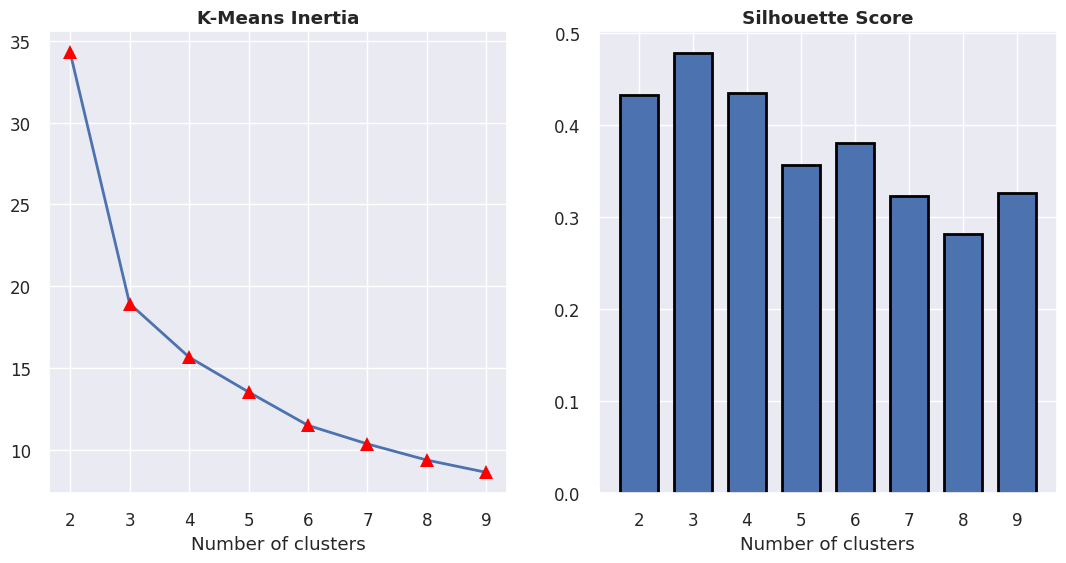

In [ ]:
sns.set(style="darkgrid", rc={'figure.figsize':(13,6)}, font_scale=1.1)
plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="^", lw=2,mfc='red', ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia", fontweight='bold')
plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', width=.7, edgecolor="black", lw=2 )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters")
plt.title("Silhouette Score", fontweight='bold');

Elbow Plot for MinMaxScaler data


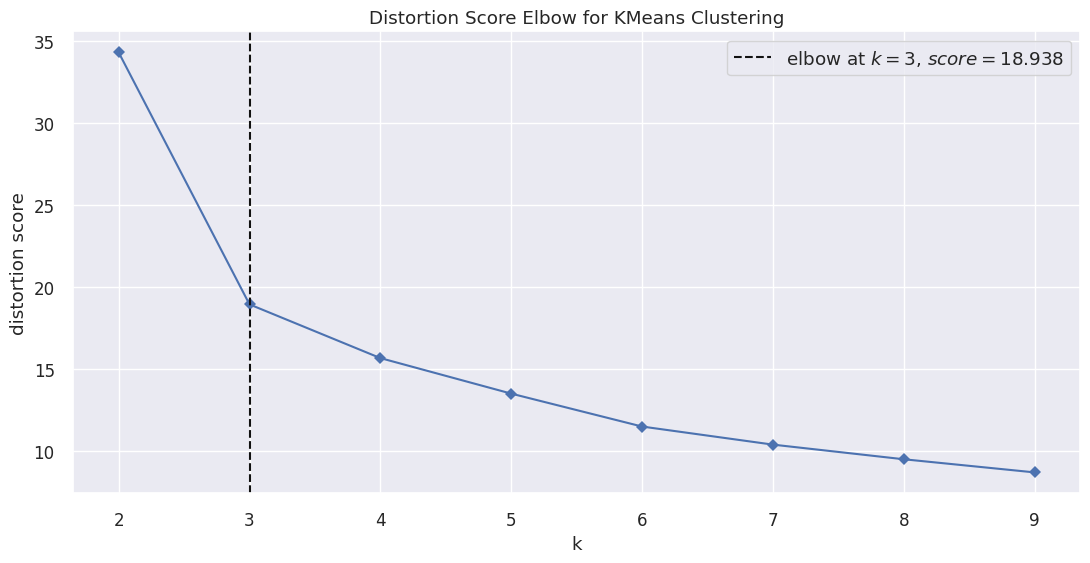

In [ ]:
model = KMeans(random_state=10, max_iter=500, init='k-means++')
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(pca_minmax_df)
visualizer.show();

Elbow Plot for MinMaxScaler data


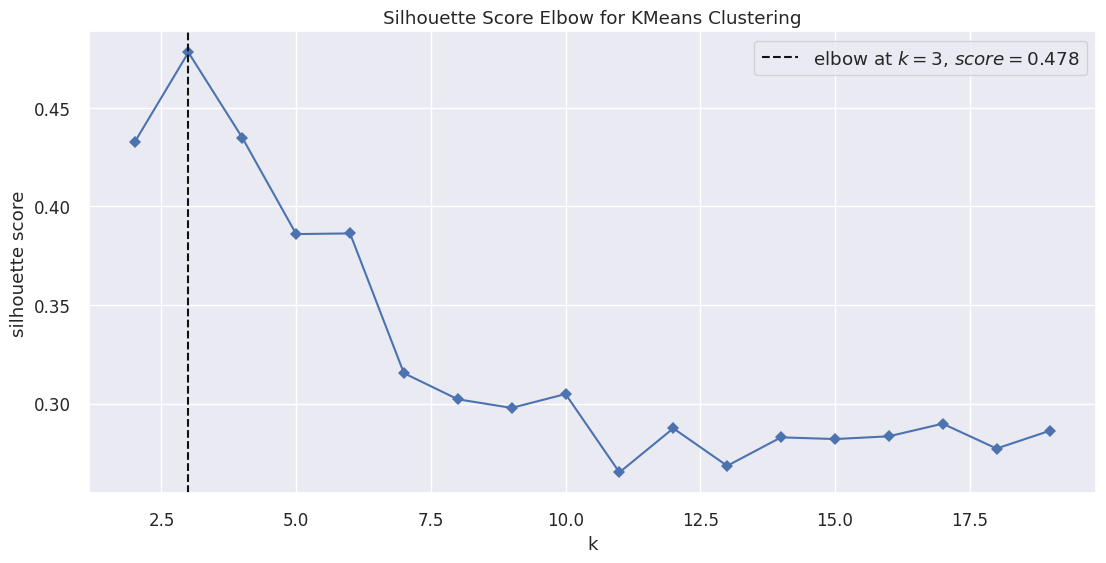

In [ ]:
model = KMeans(random_state=10, max_iter=500, init='k-means++')
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(pca_minmax_df)
visualizer.show();

In [ ]:
clust_list = [2,3,4,5,6,7,8,9]
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_minmax_df)
    sil_score1= sil(pca_minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.43235189362905235
For n_clusters = 3 The average silhouette_score is : 0.47796626568347655
For n_clusters = 4 The average silhouette_score is : 0.4347348309376317
For n_clusters = 5 The average silhouette_score is : 0.3988821893147831
For n_clusters = 6 The average silhouette_score is : 0.36777497060150016
For n_clusters = 7 The average silhouette_score is : 0.3109692906138748
For n_clusters = 8 The average silhouette_score is : 0.31644826278441907
For n_clusters = 9 The average silhouette_score is : 0.31467857033538443


Building Models:   0%|          | 0/8 [00:00<?, ?it/s]

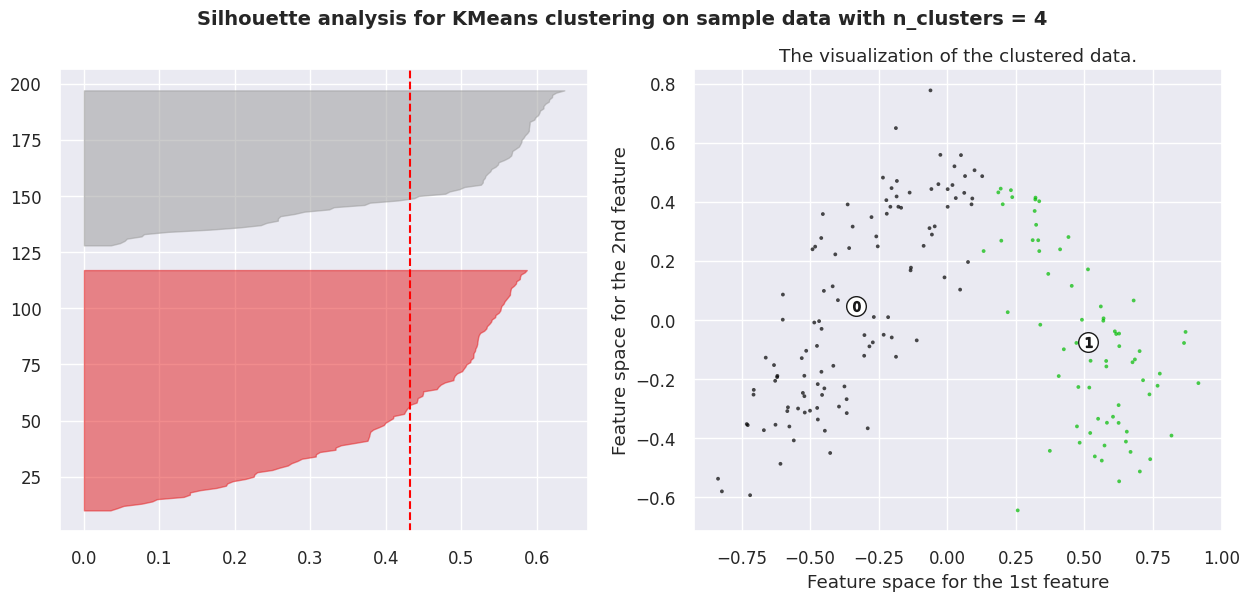

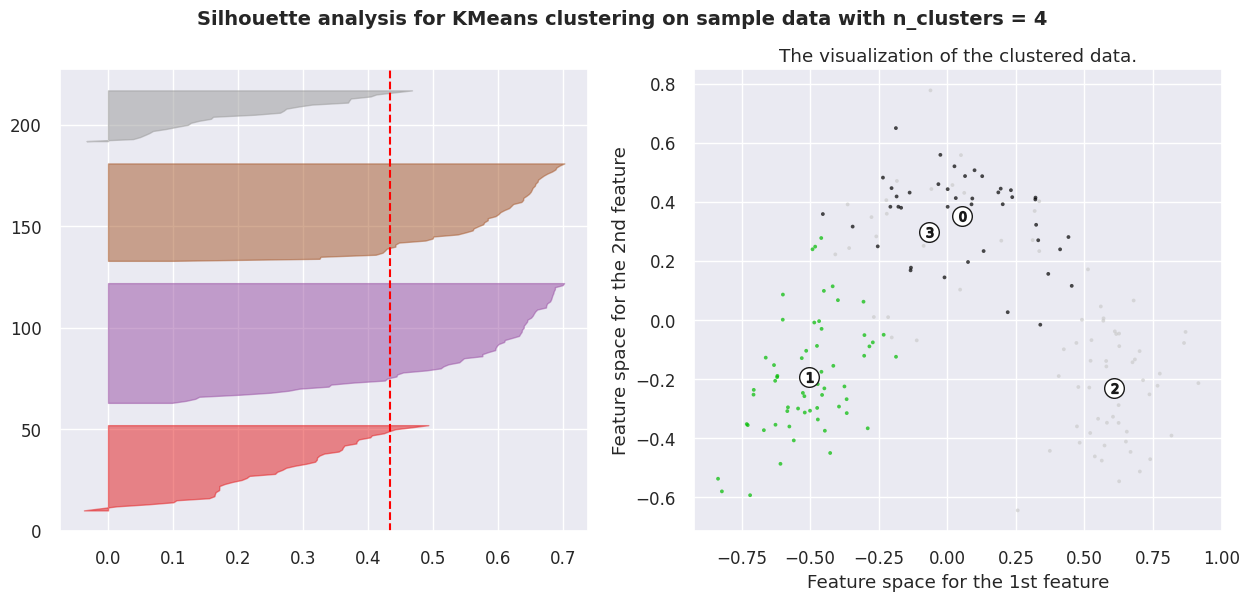

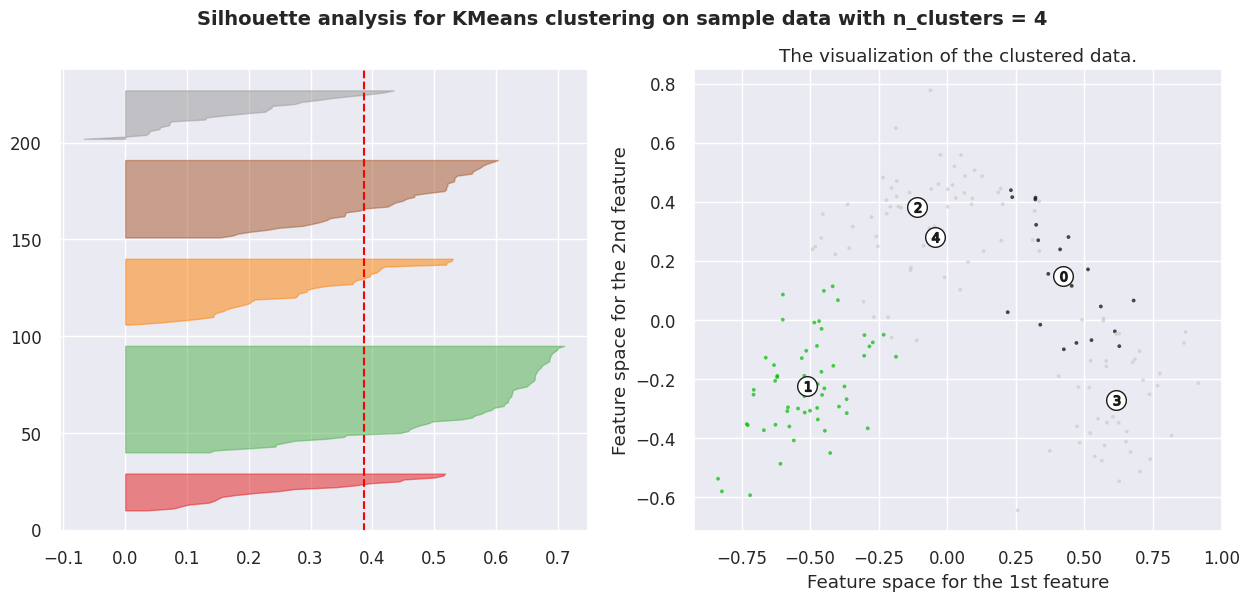

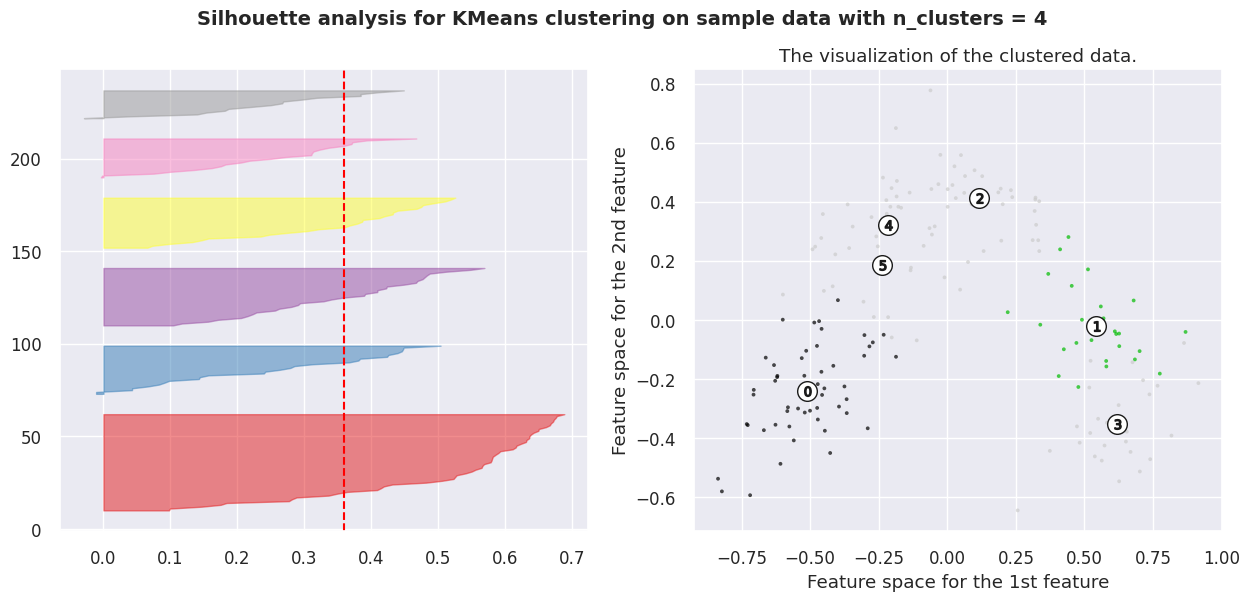

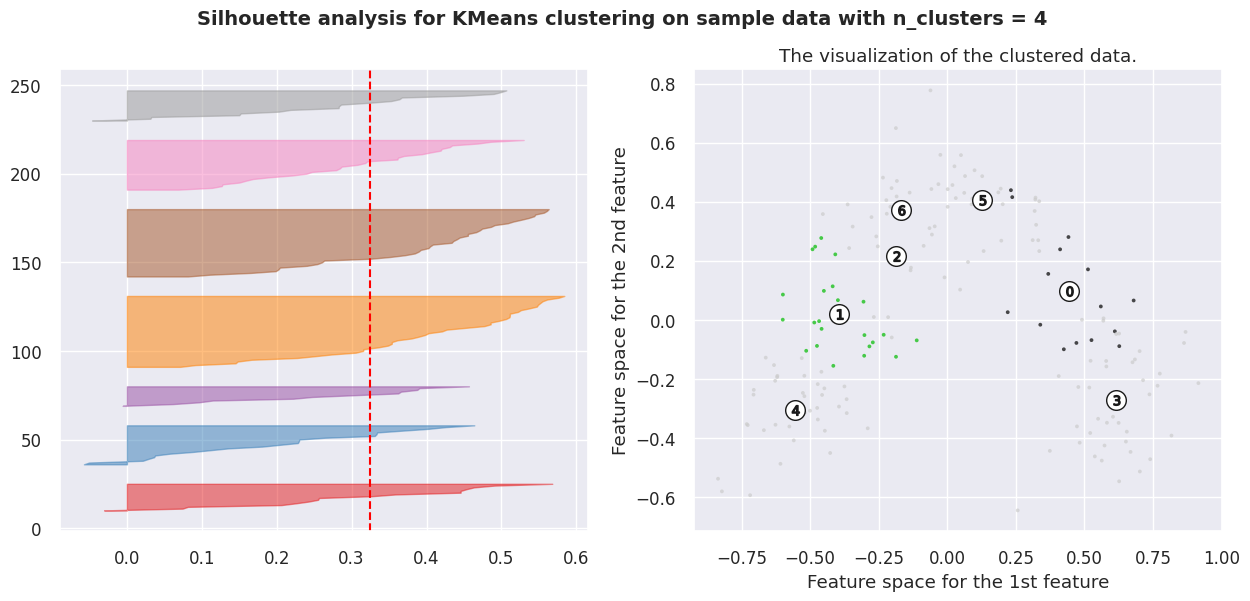

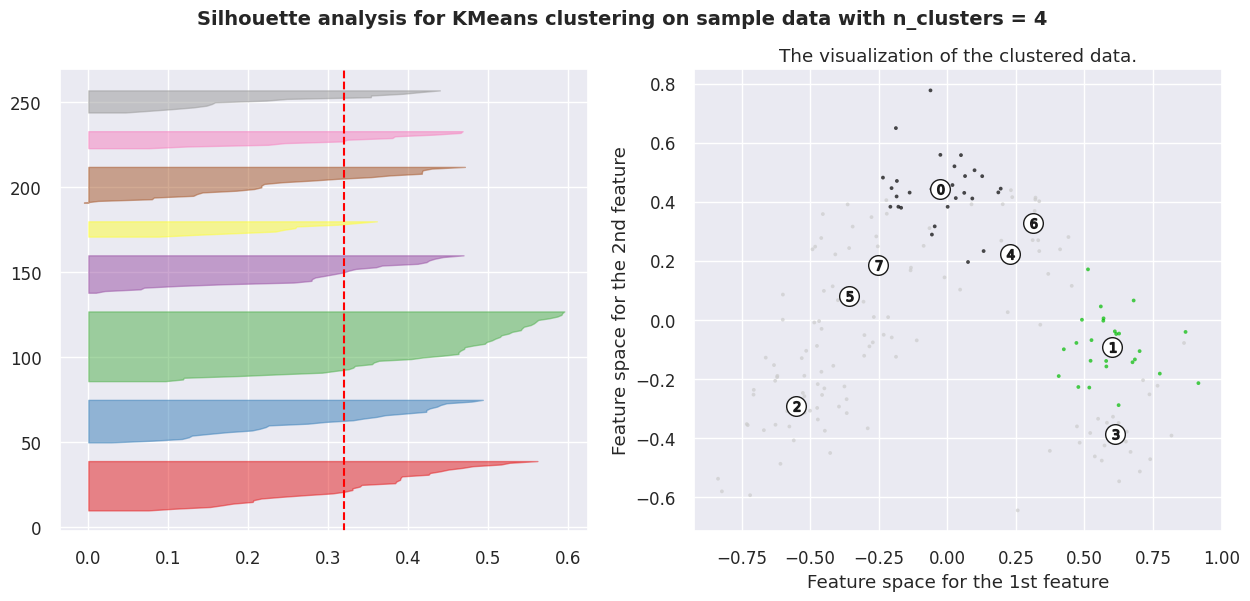

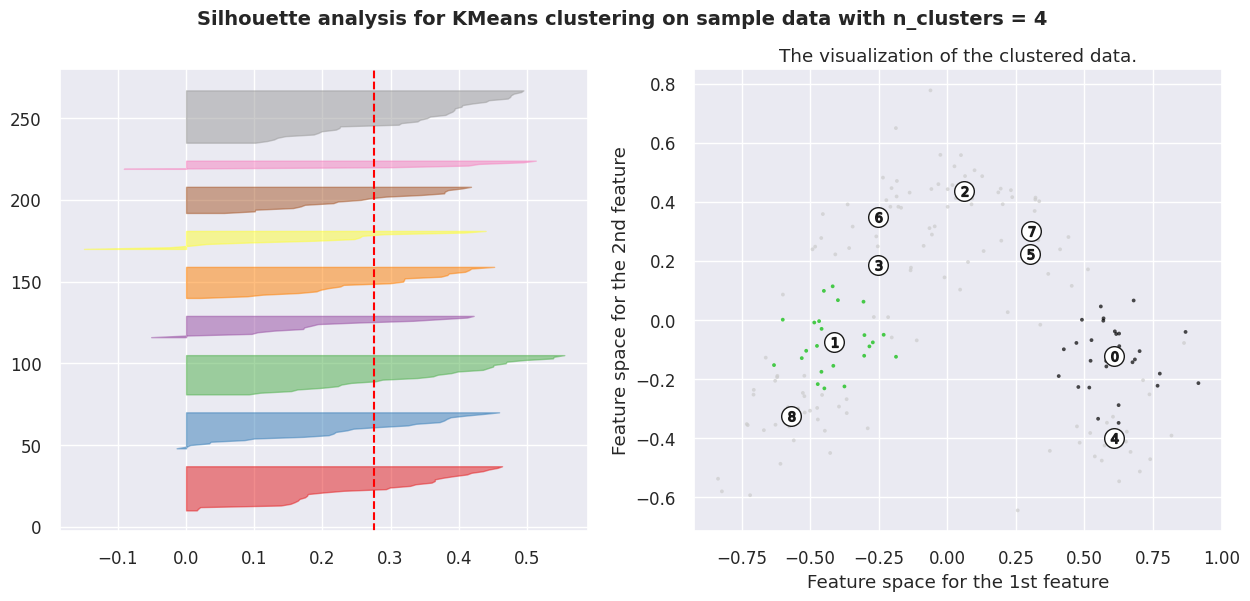

In [ ]:
for i in tq.tqdm(range(2,10),desc='Building Models'):
    model_kmeans=KMeans(n_clusters=i,init='k-means++')
    fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
    fig.set_size_inches(15,6)
    sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1)
    sil_visualizer1.fit(pca_minmax_df)

    import matplotlib.cm as cm
    colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 2) # 3 is number of clusters
    ax2.scatter(pca_minmax_df.iloc[:, 0], pca_minmax_df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors1, edgecolor='k')
    centers1 = model_kmeans.cluster_centers_
    ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers1):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')
    ax2.set_title(label ="The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                    "with n_clusters = %d" % 4),fontsize=14, fontweight='bold')
plt.show()

## The PCA on MinMax Scaler Applied data, the ideal number of clusters is 3, with a score higher than other options, of 0.47,

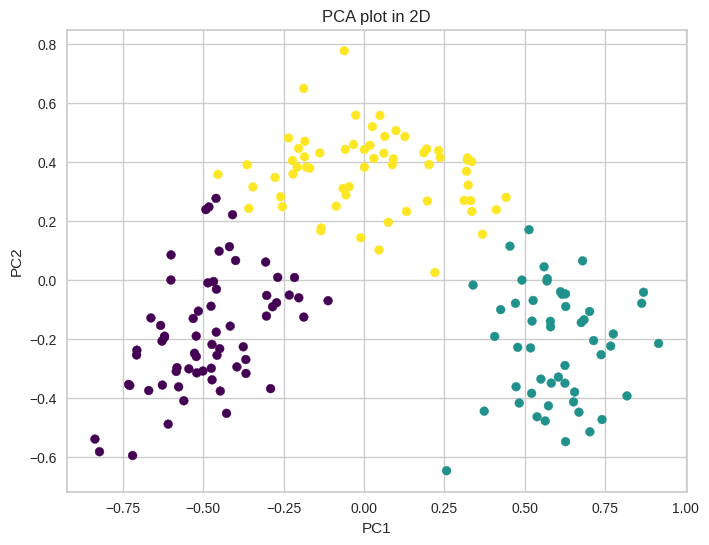

In [ ]:
model_kmeans=KMeans(n_clusters=3,init='k-means++')
model_kmeans.fit(pca_minmax_df)
plt.figure(figsize=(8,6))
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=model_kmeans.labels_,cmap='viridis', s=40)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

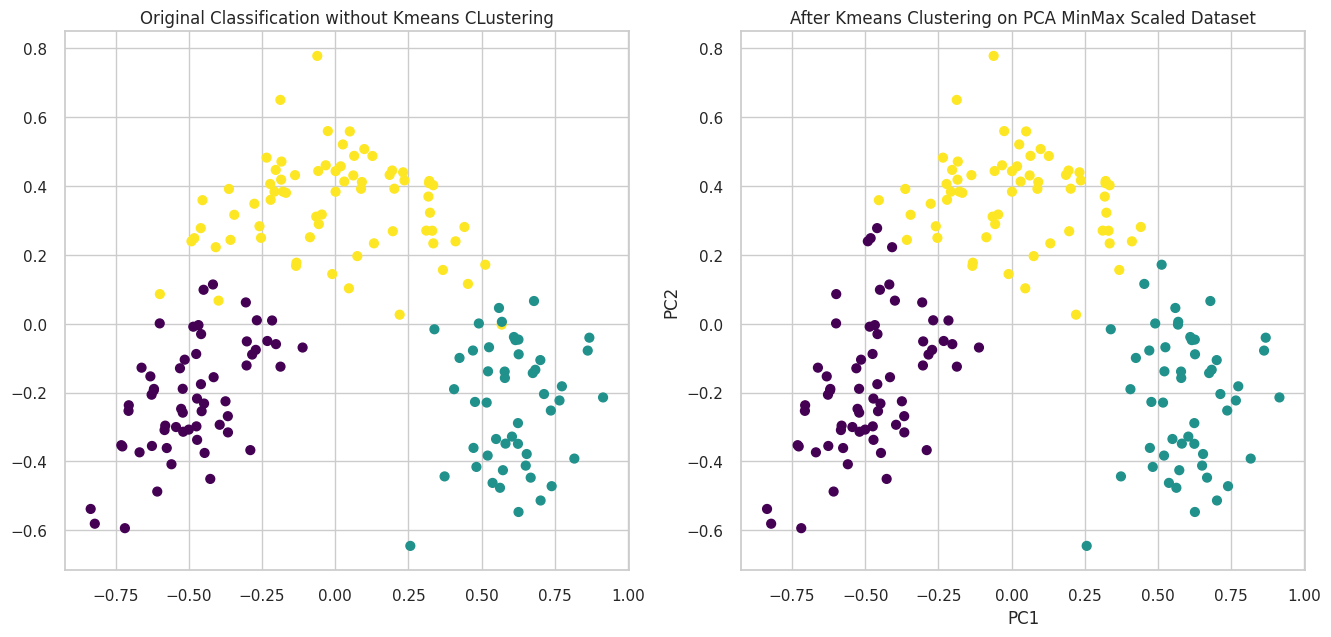

In [ ]:
f,axs=plt.subplots(1,2,figsize=(16,7))
sns.set(style='white')
axs[1].scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=model_kmeans.labels_,cmap='viridis' ,s=40)
axs[1].set_title('After Kmeans Clustering on PCA MinMax Scaled Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
data['c']=data['Type']-1
data['c']=data.c.replace({1:2,2:1})
axs[0].scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=data['c'],cmap='viridis',s=40)
axs[0].set_title('Original Classification without Kmeans CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



---


# Heirarchical cluster

minmax scaled data

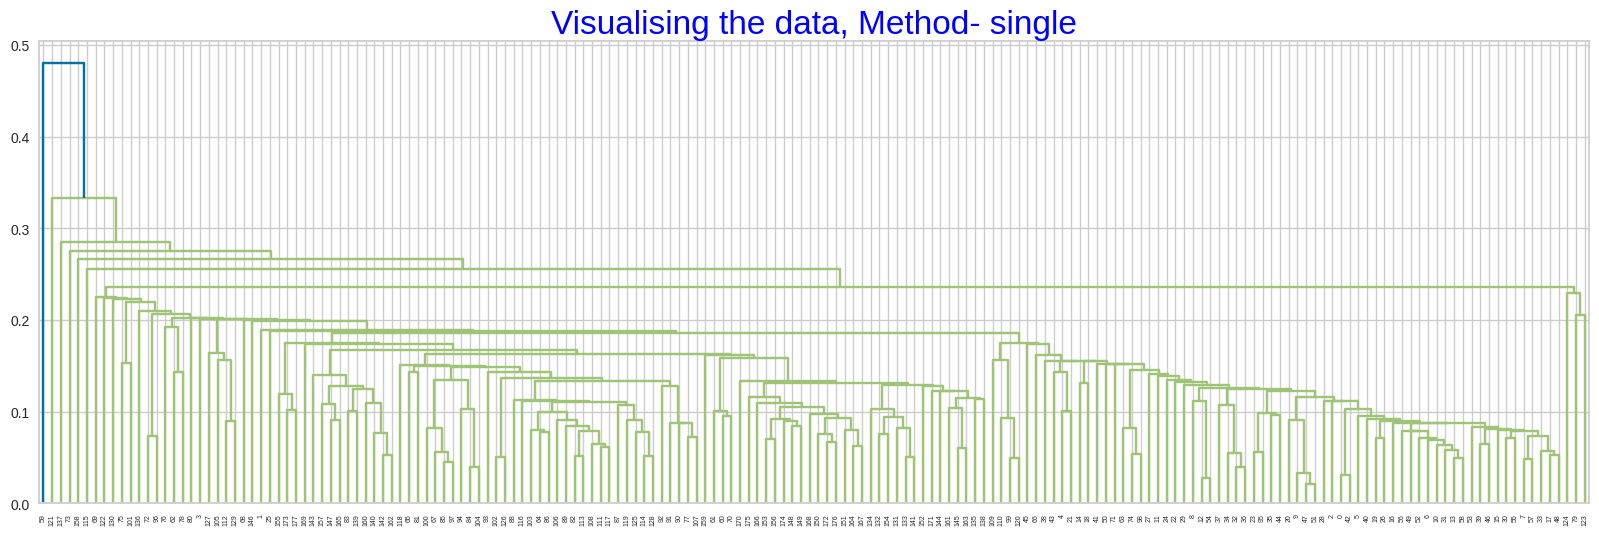

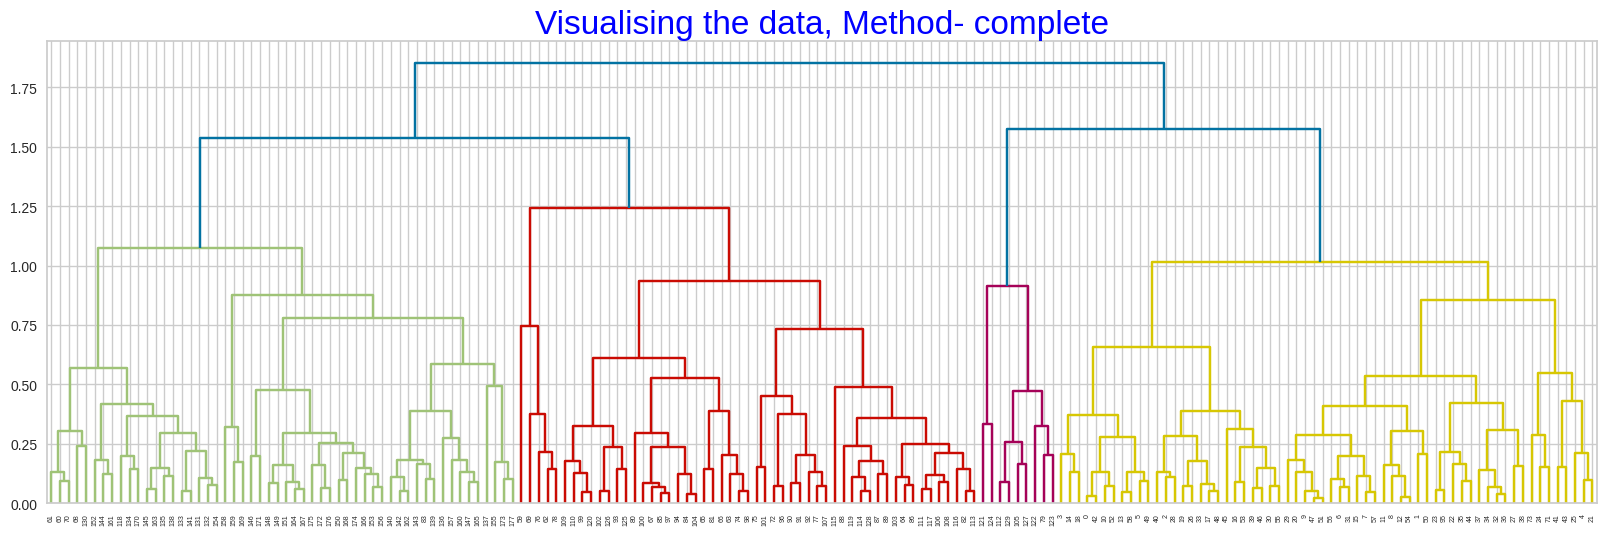

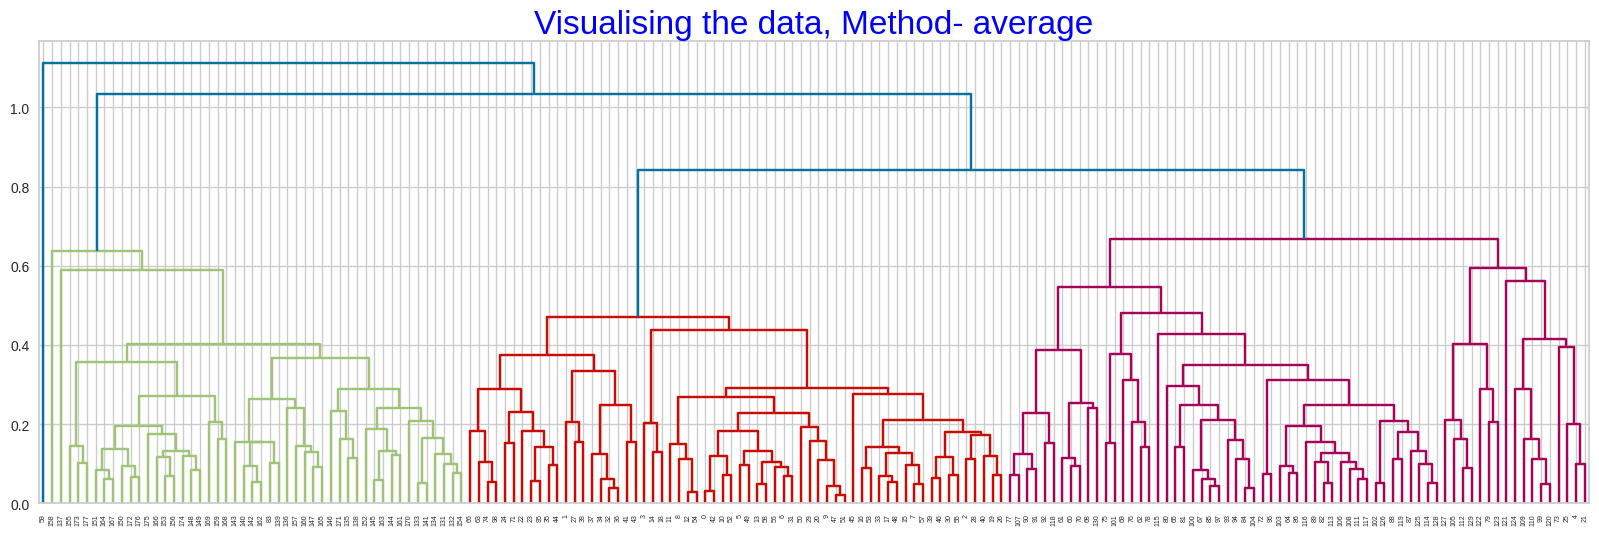

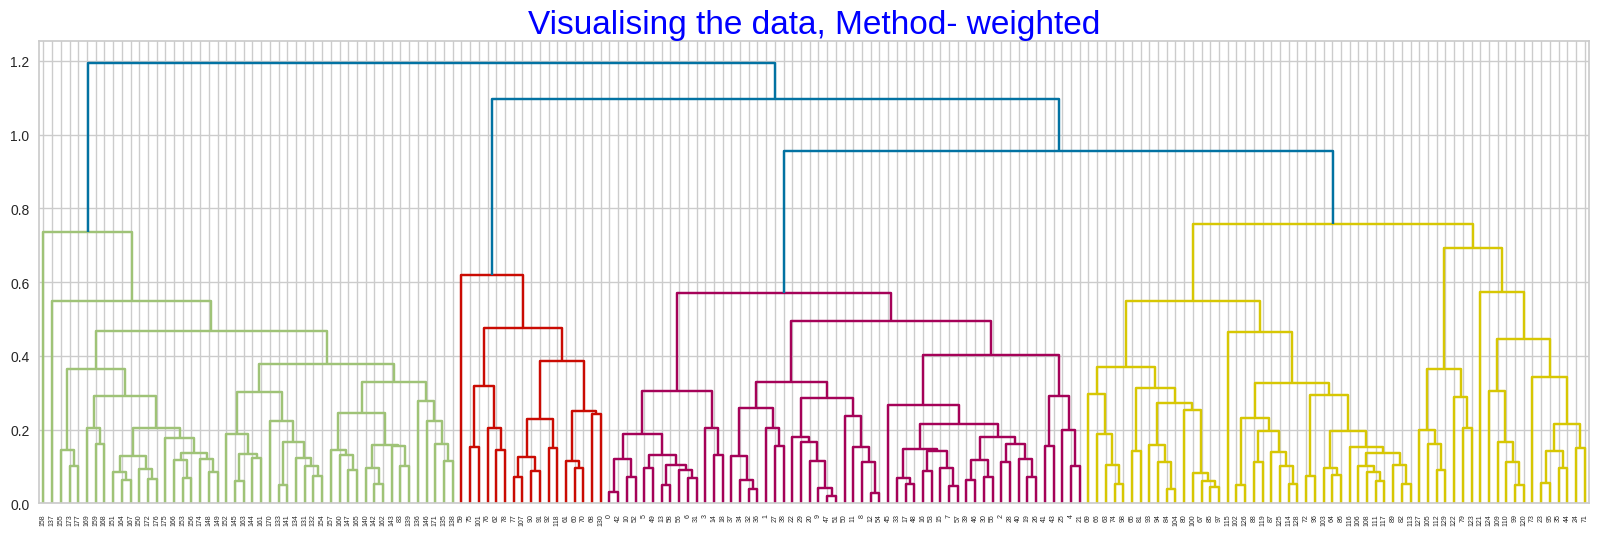

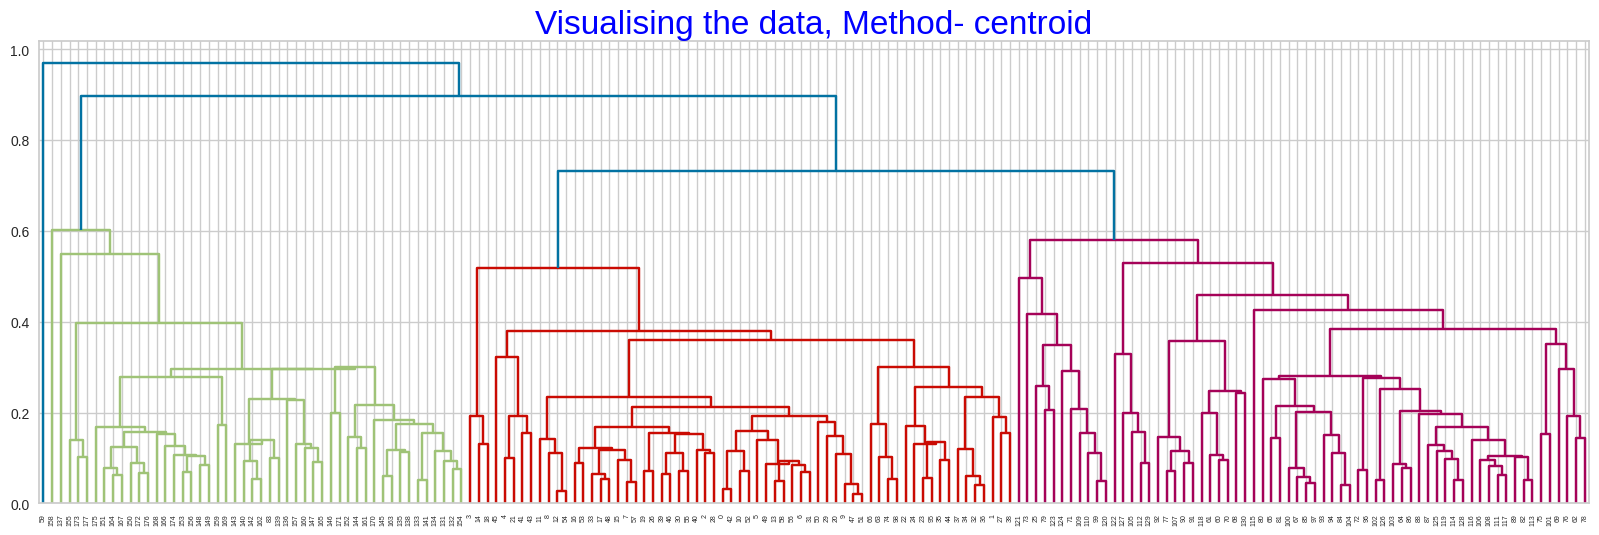

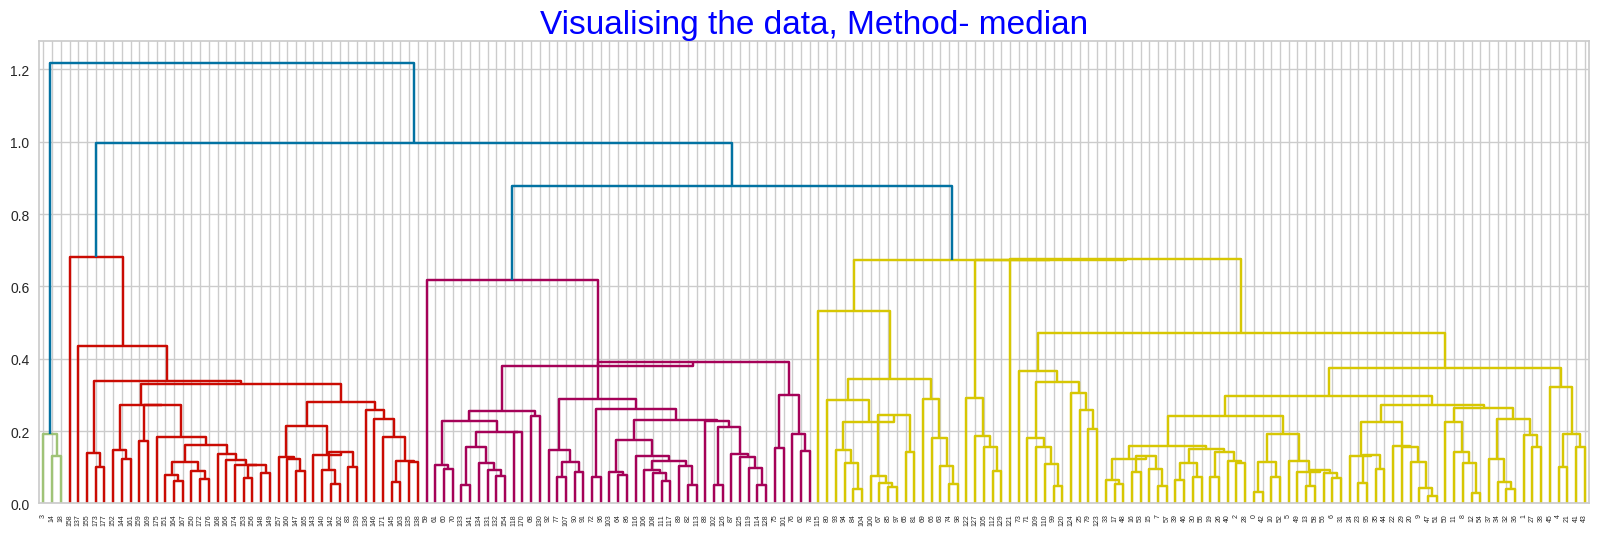

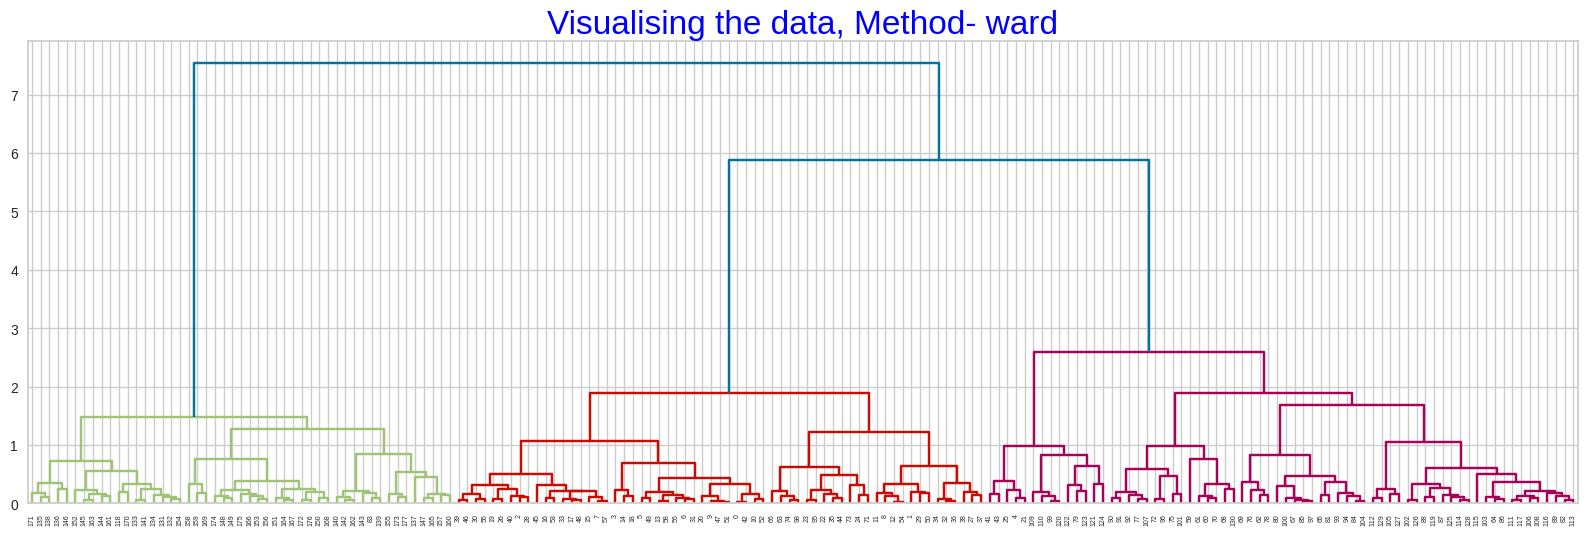

In [ ]:
for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(20, 6))
    dict = {'fontsize':24,'fontweight' :16}
    plt.title('Dendrogram : linkage - {}'.format(methods),fontdict = dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_minmax_df, method = methods,optimal_ordering=False))

In [ ]:
n_clusters = [2,3,4,5,6,7,8]
for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages)
        hie_labels1 = hie_cluster1.fit_predict(pca_minmax_df)
        silhouette_score1 = sil(pca_minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42761758661440263
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.3385358273079748
For n_clusters = 2 The average silhouette_score with linkage- average : 0.26571303050122924
For n_clusters = 2 The average silhouette_score with linkage- single : 0.26571303050122924

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4596281708499888
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.2800601589658387
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3905447482849228
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14206633532594273

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42381275627339543
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.445101756583814
For n_clusters = 4 The average silhouette_score with linkage- average : 0.44723850921169317


In [ ]:
n_clusters = [2,3,4,5,6,7,8]
for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages)
            hie_labels1 = hie_cluster1.fit_predict(pca_minmax_df)
            silhouette_score1 = sil(pca_minmax_df, hie_labels1)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.3385358273079748
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.3707653941390381
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.3385358273079748
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.3707653941390381
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.39513430070299654

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.26571303050122924
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.42761758661440263
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.26571303050122924
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.427

## The silouette score is maximum for the model with :
**cluster number - 3**<br>
**linkage - complete**<br>
**affinity - cosine**

# On pca standard scaled data`

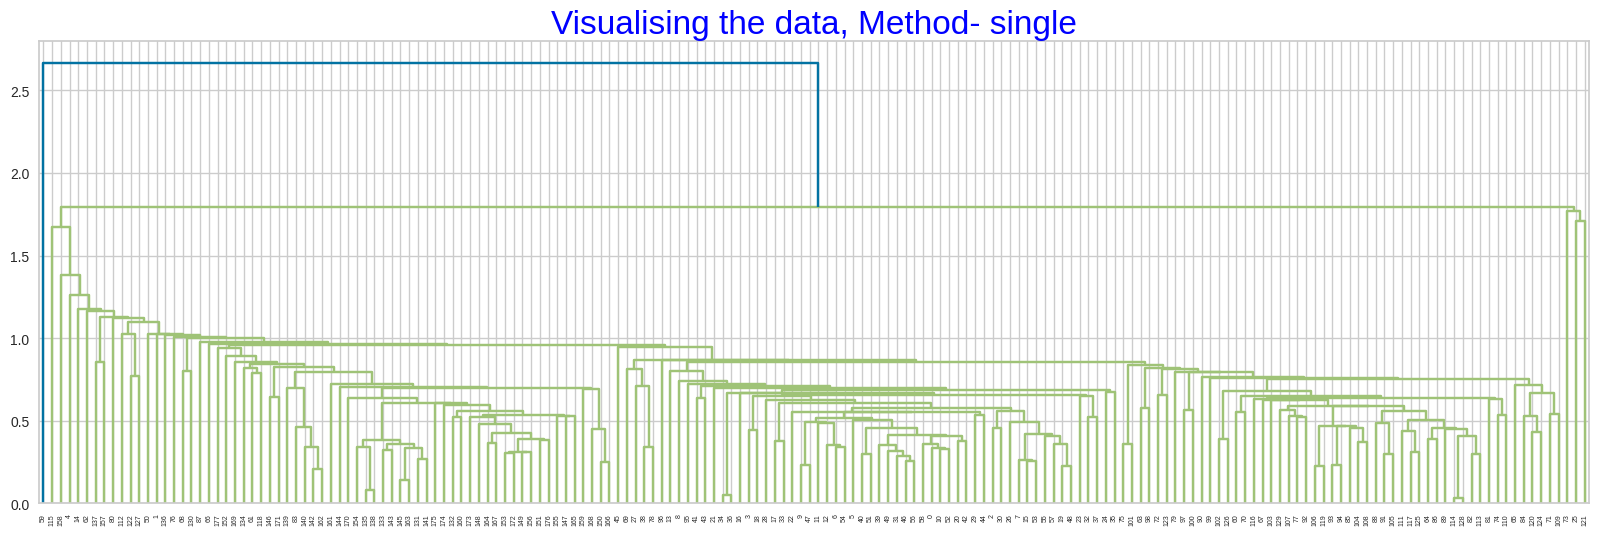

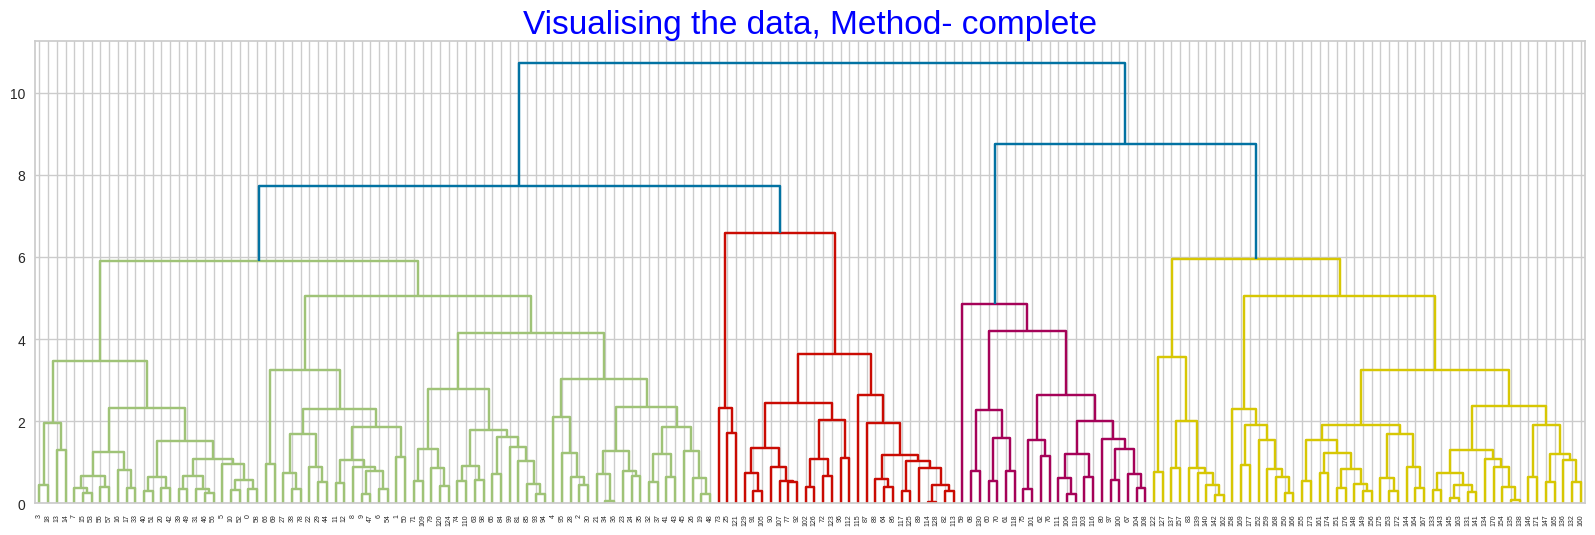

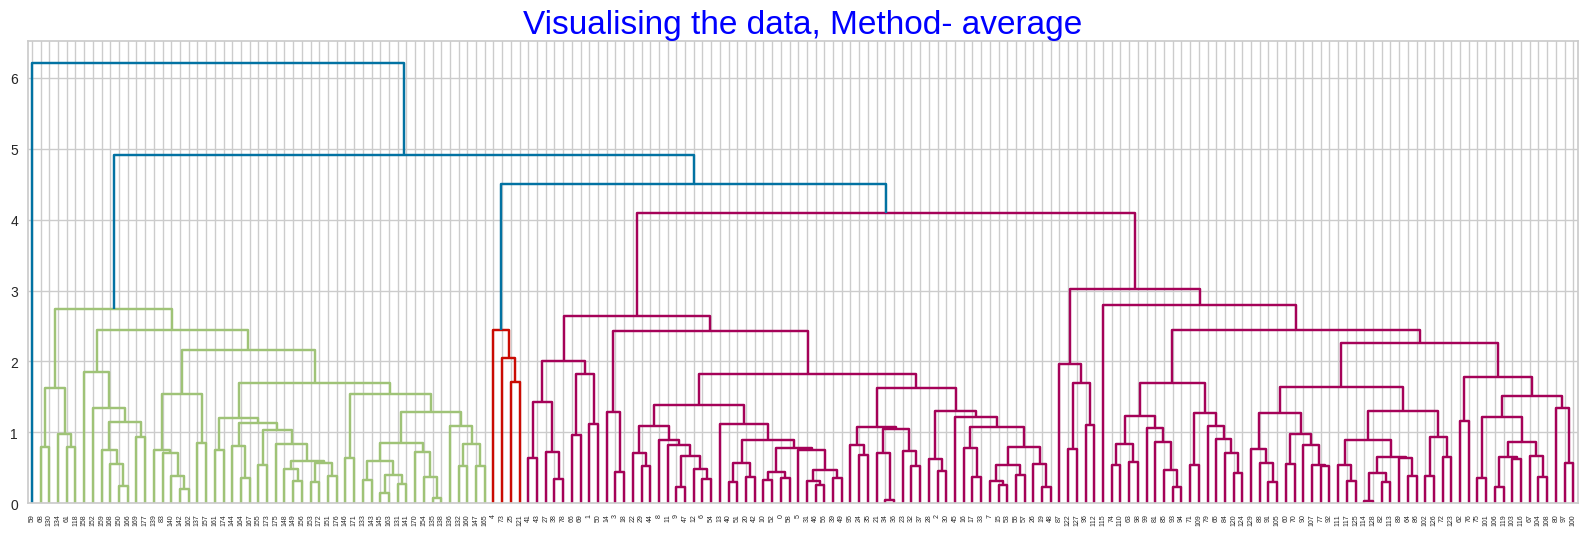

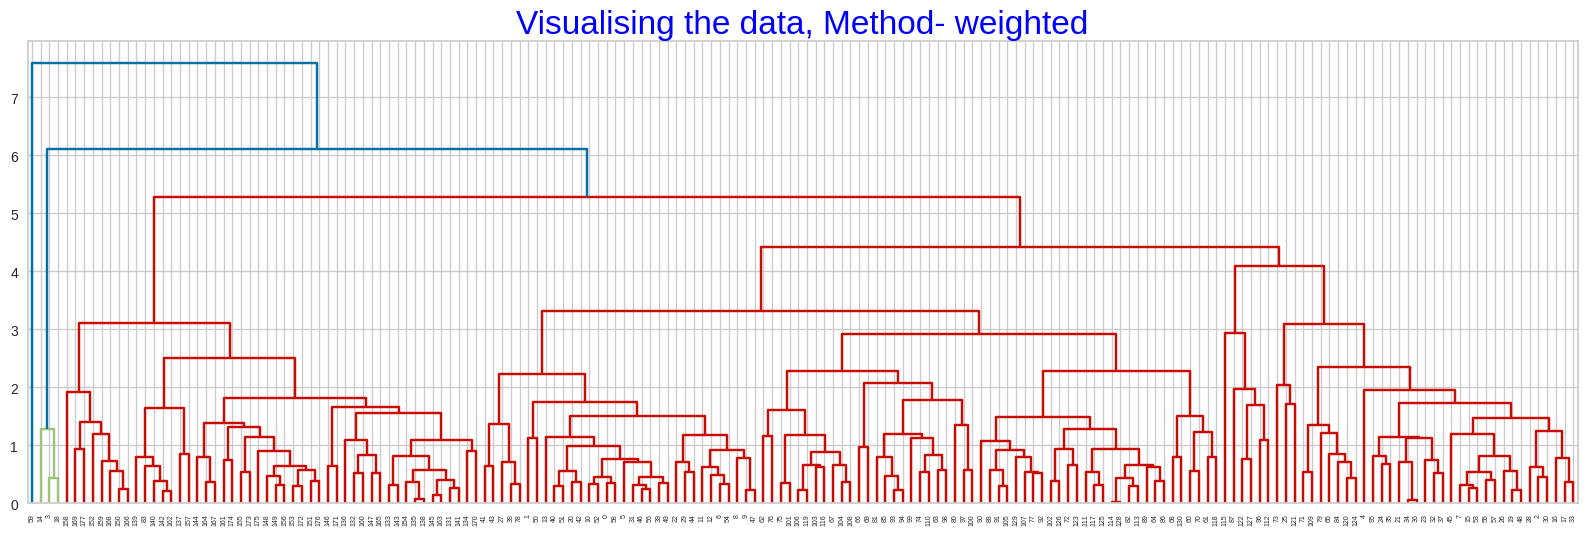

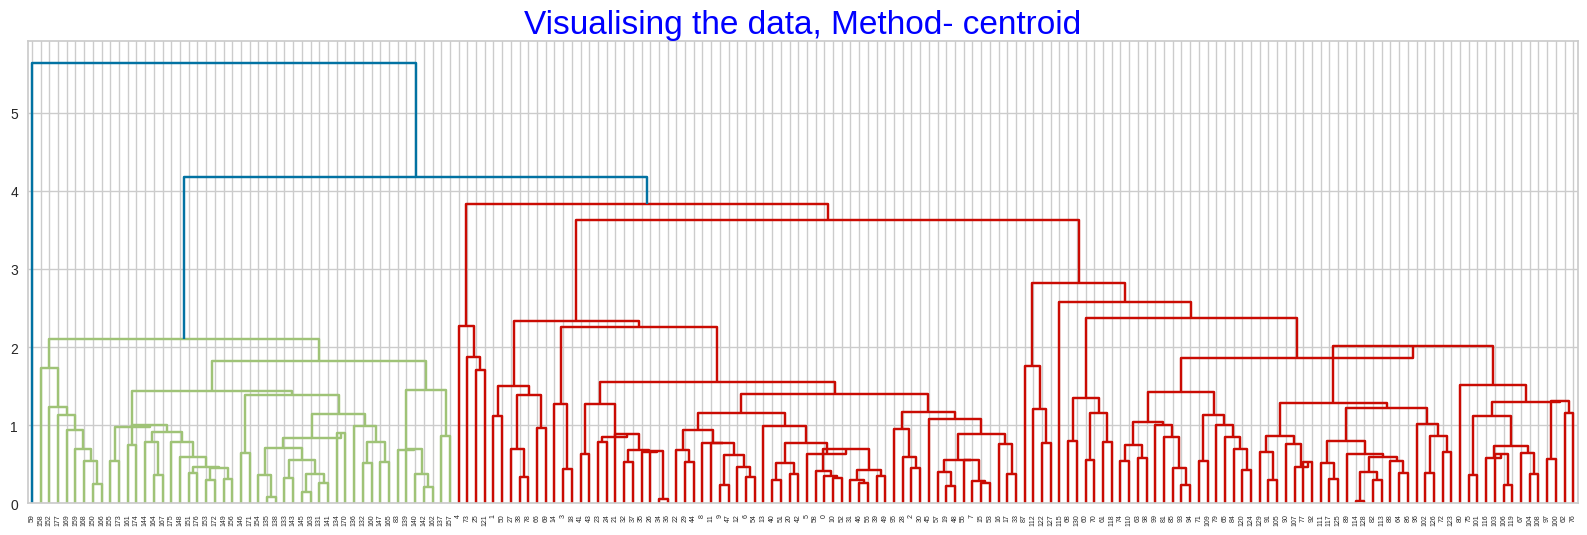

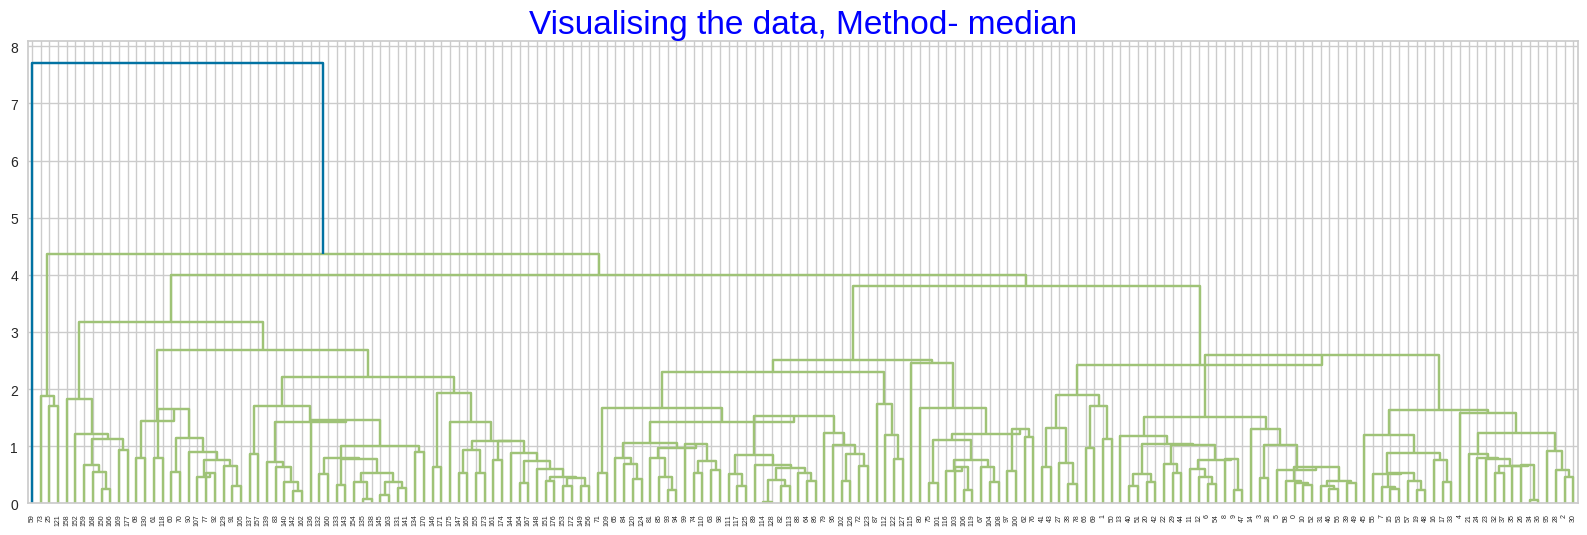

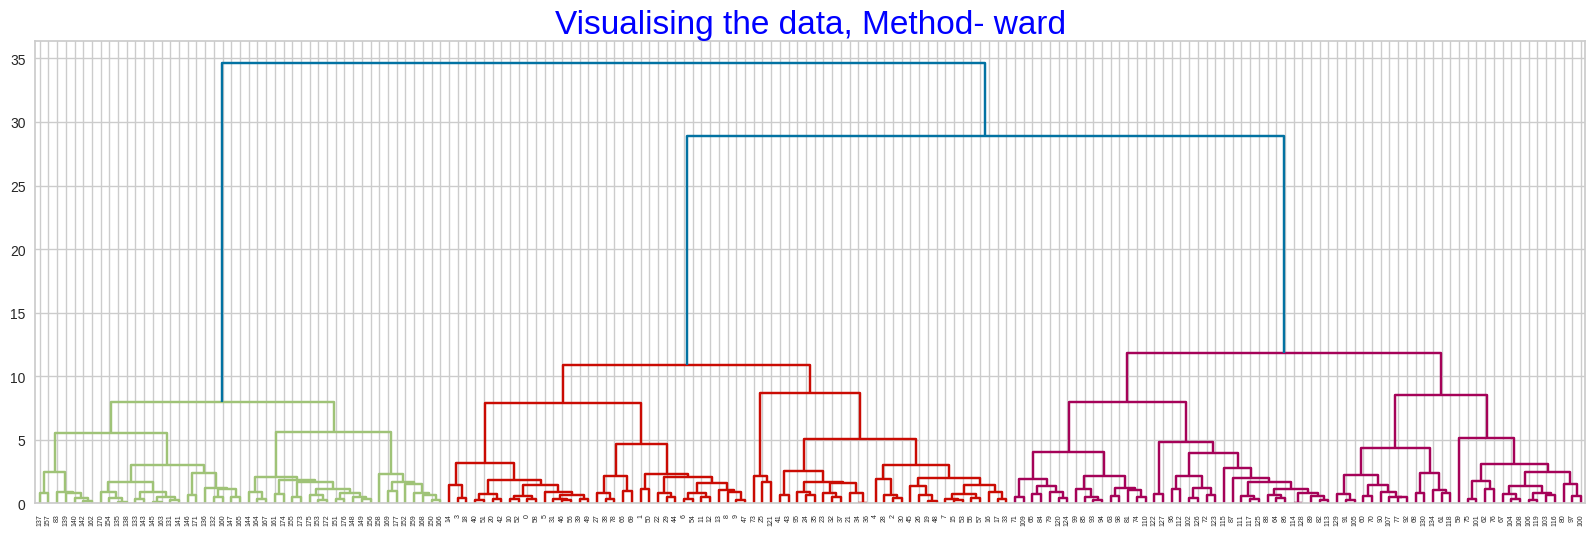

In [ ]:
for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(20, 6))

    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}

    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_std_df, method = methods,optimal_ordering=False))

In [ ]:
n_clusters = [2,3,4,5,6,7,8]
maxx=0
dd={}
for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages) # by default it takes linkage 'ward'
            hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
            silhouette_score1 = sil(pca_std_df, hie_labels1)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.3254686544245087
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.3861976738993031
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.3254686544245087
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.3861976738993031
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.3326300750899873

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.36310673051041403
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.36310673051041403
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.36310673051041403
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.3631

## The silouette score is maximum for the model with :
**cluster number - 3**<br>
**linkage - average**<br>
**affinity - cosine**<br>
# Building model

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='cosine')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print('Slhoette score ',(sil(pca_std_df, agg_clustering.labels_)*100).round(3))

Slhoette score  42.258


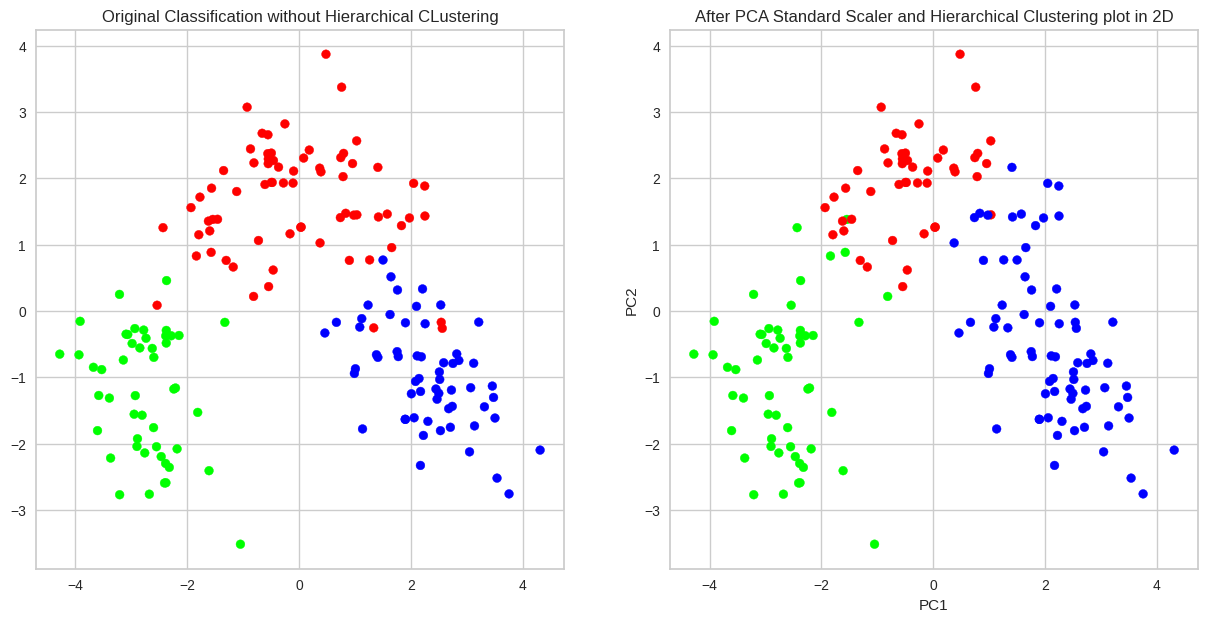

In [ ]:
f,axs=plt.subplots(1,2,figsize=(15,7))
axs[1].scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=y_pred_hie, cmap="brg", s=40)
axs[1].set_title('After PCA Standard Scaler and Hierarchical Clustering plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
axs[0].scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=data['Type'], cmap="brg", s=40)
axs[0].set_title('Original Classification without Hierarchical CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# conclusion:
## The 3 clusters has been clustered but has a negliglable amount of difference compared to original classified Feature
----------------